# Маркетинговое исследование приложения

**Описание проекта**

Необходимо провести маркетинговый анализ развлекательного приложения - несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цель исследования** - разобраться в причинах и помочь компании выйти в плюс.

**Задачи для изучения**

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов,
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

**Входные данные**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span></li><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Окупаемость рекламы</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['font.size'] = '17'

In [3]:
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # визиты
    pd.read_csv('orders_info_short.csv'),  # заказы
    pd.read_csv('costs_info_short.csv'),  # расходы
)

In [4]:
#создаём функцию для вывода информации, первых строк, дубликатов и пропусков

def check_data(data): 
    print('Общая информация')
    print('')
    print(data.info())
    print('')
    print('Первые 5 строк')
    display(data.head())
    print('')
    print('Количество дубликатов:', data.duplicated().sum())
    print('')
    print('Количество пропусков в столбцах:')
    print(data.isna().sum())

In [5]:
check_data(visits)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

Первые 5 строк


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40


Количество дубликатов: 0

Количество пропусков в столбцах:
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64


In [6]:
check_data(orders)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Первые 5 строк


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99


Количество дубликатов: 0

Количество пропусков в столбцах:
User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [7]:
check_data(costs)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Первые 5 строк


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1


Количество дубликатов: 0

Количество пропусков в столбцах:
dt         0
Channel    0
costs      0
dtype: int64


В данных всё хорошо, только нужно переименовать столбцы и привести столбцы с датой к нужному формату.

In [8]:
visits = visits.rename( 
 columns={ 
'User Id': 'user_id', 
'Region': 'region', 
'Device': 'device',
'Channel': 'channel',
'Session Start': 'session_start',
'Session End': 'session_end'
 } 
)

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
orders = orders.rename( 
 columns={ 
'User Id': 'user_id', 
'Event Dt': 'event_dt', 
'Revenue': 'revenue'
 } 
)

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [10]:
costs = costs.rename( 
 columns={ 
'Channel': 'channel',
 } 
)

costs['dt'] = pd.to_datetime(costs['dt'])

Данные загружены и обработаны: названия столбцов приведены к стандартному виду, столбцы с датой привели к формату даты. Пропусков и дубликатов в данных нет.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    new_users['dt'] = pd.to_datetime(new_users['dt'])
    
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(25, 15))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(30, 20))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

В первую очередь составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей.

In [19]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())
print('Минимальная дата привлечения:', profiles['dt'].min())
print('Максимальная дата привлечения:', profiles['dt'].max())

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

Минимальная дата привлечения: 2019-05-01 00:00:00
Максимальная дата привлечения: 2019-10-27 00:00:00


Мы получили профили пользователей: уникальный id, дату первого посещения, источник перехода, тип устройства и страну пользователя, признак плательщика и стоимость привлечения. Данные примерно за полгода: с 1 мая по 27 октября, что совпадает с описанием датасета, которое мы получили.

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

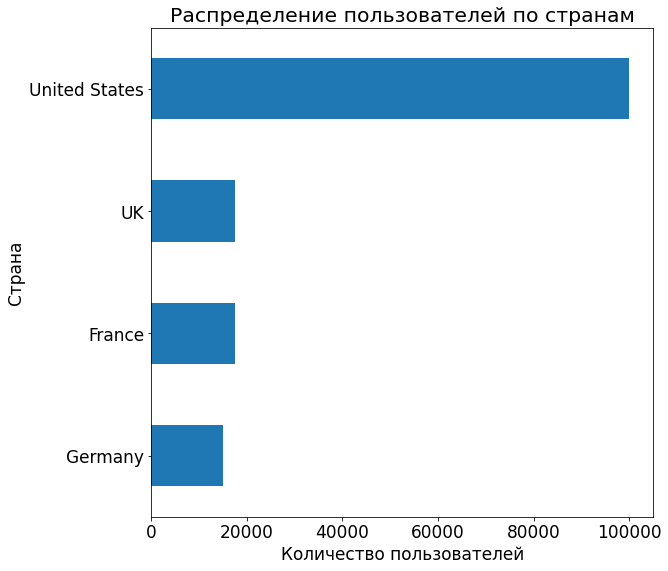

In [20]:
(profiles['region'].value_counts().sort_values()
       .plot(kind='barh', figsize=(9,9), title='Распределение пользователей по странам'))
plt.xlabel('Количество пользователей')
plt.ylabel('Страна')
plt.show()

In [21]:
pt_reg = profiles.pivot_table(index='region', values='payer', aggfunc=['count', 'sum'])
pt_reg.columns = ['all_users', 'payers']
pt_reg['percent'] = round((pt_reg['payers']/pt_reg['all_users']*100), 2)
pt_reg.sort_values(by='percent', ascending=False)

all_users  payers  percent
region                                   
United States     100002    6902     6.90
Germany            14981     616     4.11
UK                 17575     700     3.98
France             17450     663     3.80

Больше всего пользователей приходит из США - примерно в 5 раз больше чем по каждой другой стране и в 2 раза больше, чем суммарно из других стран. Однако процент платящих пользователей в США больше, чем во Франции, Германии или Великобритании всего примерно в 1,7 раза.

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Для этого построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

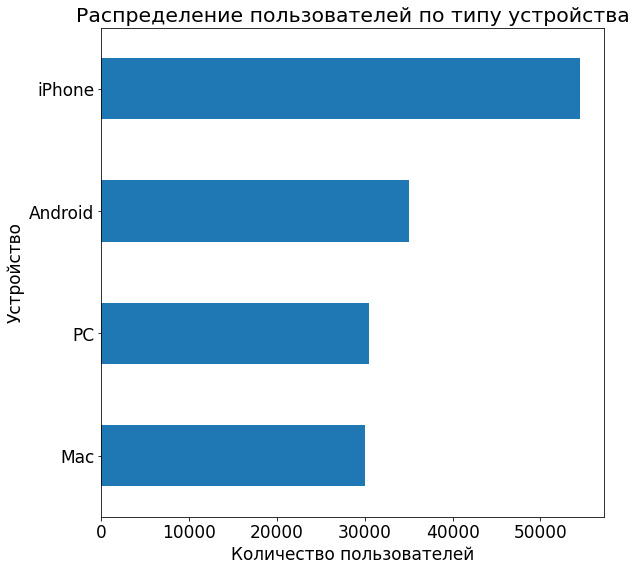

In [22]:
(profiles['device'].value_counts().sort_values()
       .plot(kind='barh', figsize=(9,9), title='Распределение пользователей по типу устройства'))
plt.xlabel('Количество пользователей')
plt.ylabel('Устройство')
plt.show()

In [23]:
pt_dev = profiles.pivot_table(index='device', values='payer', aggfunc=['count', 'sum'])
pt_dev.columns = ['all_users', 'payers']
pt_dev['percent'] = round((pt_dev['payers']/pt_dev['all_users']*100), 2)
pt_dev.sort_values(by='percent', ascending=False)

all_users  payers  percent
device                             
Mac          30042    1912     6.36
iPhone       54479    3382     6.21
Android      35032    2050     5.85
PC           30455    1537     5.05

Большинство пользователей заходят в приложение с айфона. Но процент "плательщиков" больше всего у тех, кто пользуются макбуками. Меньше всего процент платящих пользователей у тех, кто пользуются обычными ПК.

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

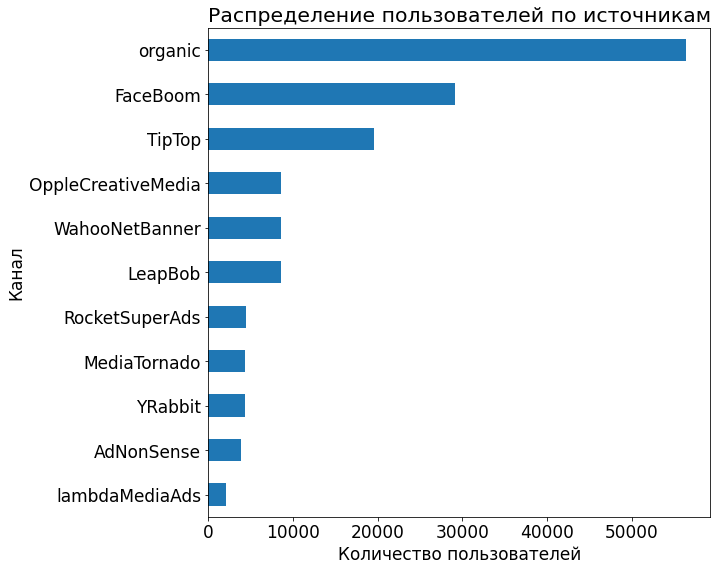

In [24]:
(profiles['channel'].value_counts().sort_values()
       .plot(kind='barh', figsize=(9,9), title='Распределение пользователей по источникам'))
plt.xlabel('Количество пользователей')
plt.ylabel('Канал')
plt.show()

In [25]:
pt_chnl = profiles.pivot_table(index='channel', values='payer', aggfunc=['count', 'sum'])
pt_chnl.columns = ['all_users', 'payers']
pt_chnl['percent'] = round((pt_chnl['payers']/pt_chnl['all_users']*100), 2)
pt_chnl.sort_values(by='percent', ascending=False)

all_users  payers  percent
channel                                       
FaceBoom                29144    3557    12.20
AdNonSense               3880     440    11.34
lambdaMediaAds           2149     225    10.47
TipTop                  19561    1878     9.60
RocketSuperAds           4448     352     7.91
WahooNetBanner           8553     453     5.30
YRabbit                  4312     165     3.83
MediaTornado             4364     156     3.57
LeapBob                  8553     262     3.06
OppleCreativeMedia       8605     233     2.71
organic                 56439    1160     2.06

Большинство пользователей "органические", то есть приходят не с платных рекламных каналов, а напрямую. Также популярными источниками перехода являются FaceBoom и TipTop. Однако, если смотреть на процент плательщиков, то органические пользователи становятся ими реже всего - всего 2% от их общего количества. Больше всего платящих пользователей пришли из FaceBoom, а также высокий процент у lambdaMediaAds и AdNonSense, чуть меньше у TipTop.
Таким образом, на этом этапе можно сказать, что выгоднее всего закупать рекламу на площадке FaceBoom и TipTop.

Таким образом можно описать пользователей приложения следующим образом:
- 2/3 пользователей приходят из США, оставшаяся треть примерно поровну распределена между Великобританией, Германией и Францией;
- 1/3 пользователей заходят через айфоны, оставшиеся 2/3 почти поровну распределены между макбуками и ПК, чуть больше пользователей пользуются андроидами;
- 1/3 пользователей пришли напрямую, не из платных источников;
- платных источников всего 10, самые популярные и эффективные FaceBoom и TipTop.

## Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [26]:
all_sum = profiles['acquisition_cost'].sum()
print('Общая сумма расходов на маркетинг составила', all_sum)

Общая сумма расходов на маркетинг составила 105497.29999999999


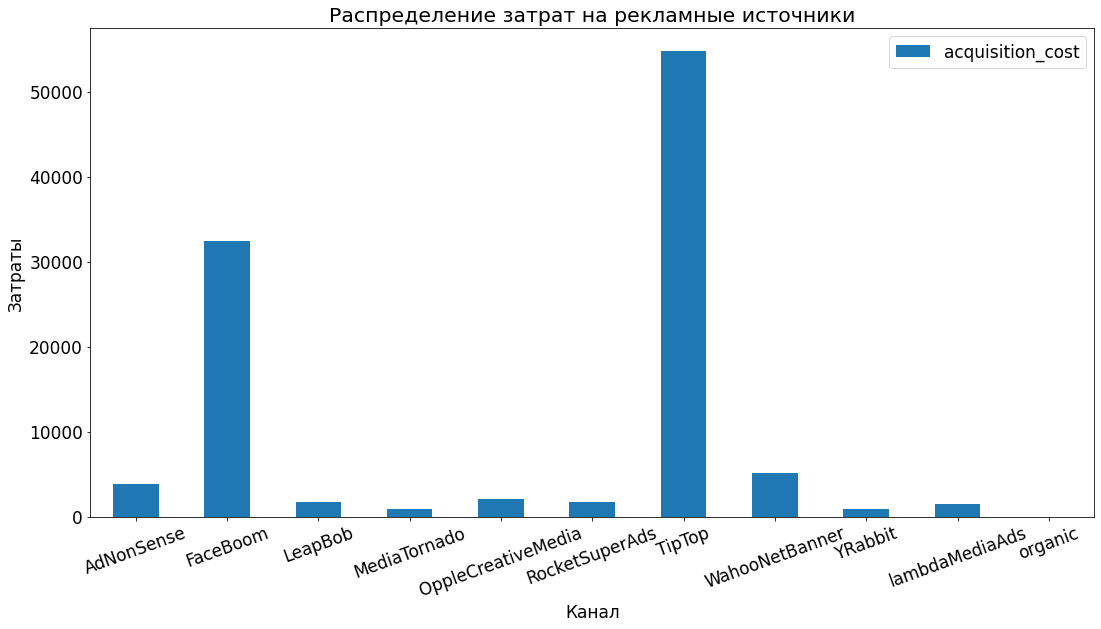

In [27]:
(profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum')
       .plot(kind='bar', figsize=(18,9), title='Распределение затрат на рекламные источники'))
plt.xlabel('Канал')
plt.xticks(rotation=20)
plt.ylabel('Затраты')
plt.show()

In [28]:
channel_costs = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum')
channel_costs['percent'] = round((channel_costs['acquisition_cost']/all_sum*100), 2)
channel_costs.sort_values(by='percent', ascending=False)

acquisition_cost  percent
channel                                      
TipTop                      54751.30    51.90
FaceBoom                    32445.60    30.75
WahooNetBanner               5151.00     4.88
AdNonSense                   3911.25     3.71
OppleCreativeMedia           2151.25     2.04
RocketSuperAds               1833.00     1.74
LeapBob                      1797.60     1.70
lambdaMediaAds               1557.60     1.48
MediaTornado                  954.48     0.90
YRabbit                       944.22     0.90
organic                         0.00     0.00

Затраты на рекламные источники ожидаемо самые высокие у самых "крупных" каналов - FaceBoom и TipTop. Однако у TipTop затраты почти в 2 раза выше, хотя пользователей оттуда приходит меньше, в том числе платных. Значит, у этого канала очень высокая стоимость за пользователя. Органические пользователи стоят 0, в данных всё корректно.

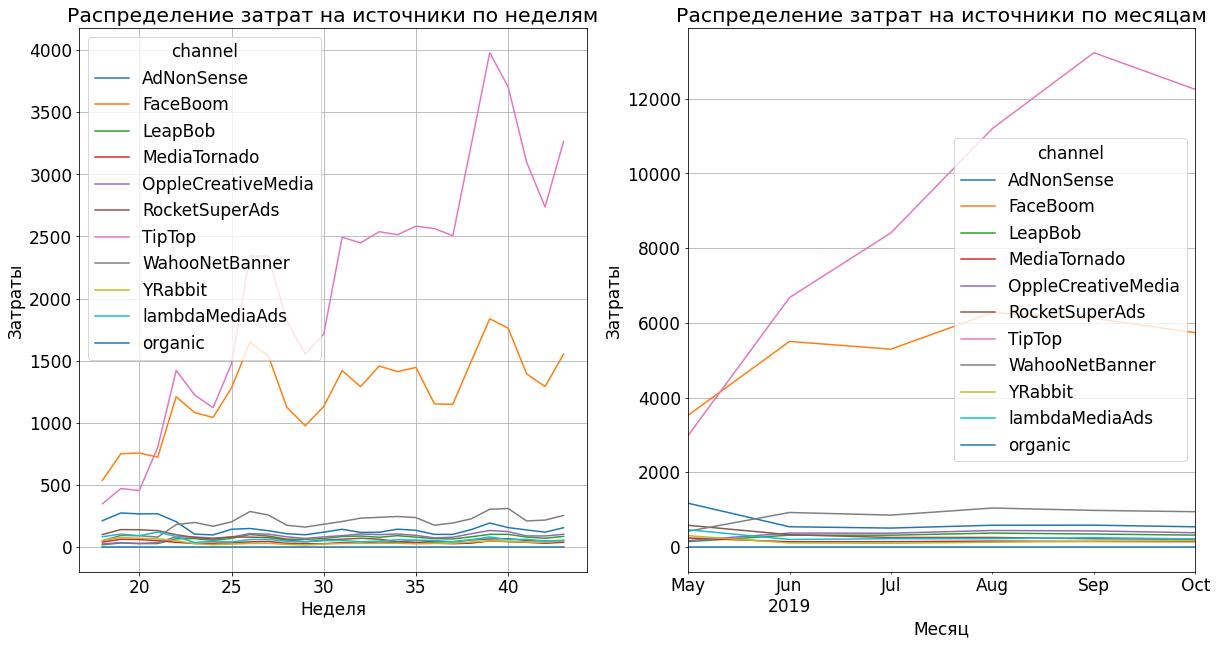

In [29]:
plt.figure(figsize=(20, 10)) 

profiles['week'] = profiles['dt'].dt.isocalendar().week
 
(profiles.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')
 .plot(grid=True,ax=plt.subplot(1, 2, 1)))
plt.title('Распределение затрат на источники по неделям') 
plt.xlabel('Неделя') 
plt.ylabel('Затраты') 
 
(profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
 .plot(grid=True,ax=plt.subplot(1, 2, 2)))
plt.title('Распределение затрат на источники по месяцам') 
plt.xlabel('Месяц') 
plt.ylabel('Затраты')
plt.show()

У "дешёвых" рекламных источников затраты почти не меняются с течением времени. А вот у "дорогих" они заметно выросли с мая. И если у FaceBoom можно предположить, что это, например, сезонное изменение, то у TipTop затраты с мая по октябрь увеличились в разы. Возможно, эффективнее было бы перестать вкладываться в этот канал.

In [30]:
cac = round(all_sum/profiles['user_id'].count(), 2)

In [31]:
mean_cac = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc=['count', 'sum'])
mean_cac.columns = ['all_users', 'costs']
mean_cac['mean_cac'] = round((mean_cac['costs']/mean_cac['all_users']), 2)
mean_cac['cac'] = cac
mean_cac.sort_values(by='mean_cac', ascending=False)

all_users     costs  mean_cac  cac
channel                                               
TipTop                  19561  54751.30      2.80  0.7
FaceBoom                29144  32445.60      1.11  0.7
AdNonSense               3880   3911.25      1.01  0.7
lambdaMediaAds           2149   1557.60      0.72  0.7
WahooNetBanner           8553   5151.00      0.60  0.7
RocketSuperAds           4448   1833.00      0.41  0.7
OppleCreativeMedia       8605   2151.25      0.25  0.7
MediaTornado             4364    954.48      0.22  0.7
YRabbit                  4312    944.22      0.22  0.7
LeapBob                  8553   1797.60      0.21  0.7
organic                 56439      0.00      0.00  0.7

Как и ожидалось, самый высокий CAC у канала TipTop. Он выше, чем у FaceBoom, в 2,5 раза и в 4 раза выше, чем средний САС по всему датасету. Выше среднего САС и у каналов FaceBoom и AdNonSense.

Итак, мы заметили, что с мая резко выросли затраты у двух рекламных каналов - FaceBoom и TipTop. Несмотря на то, что это самые популярные каналы, всё равно кажется, что они слишком дорогие: на них идёт 80% всех расходов, а CAC по ним значительно выше среднего - в 1.5 раза у FaceBoom и в 4 раза у TipTop. Стоит посмотреть на окупаемость, но возможно выгоднее было бы их отключить.

## Окупаемость рекламы

Проанализируем окупаемость рекламы. На календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

Устанавливаем момент и горизонт анализа. Убираем из таблицы органических пользователей, на них нет затрат, следовательно мы не можем оценить и их окупаемость.

In [32]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles = profiles.query('channel != "organic"')

Проанализируем общую окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

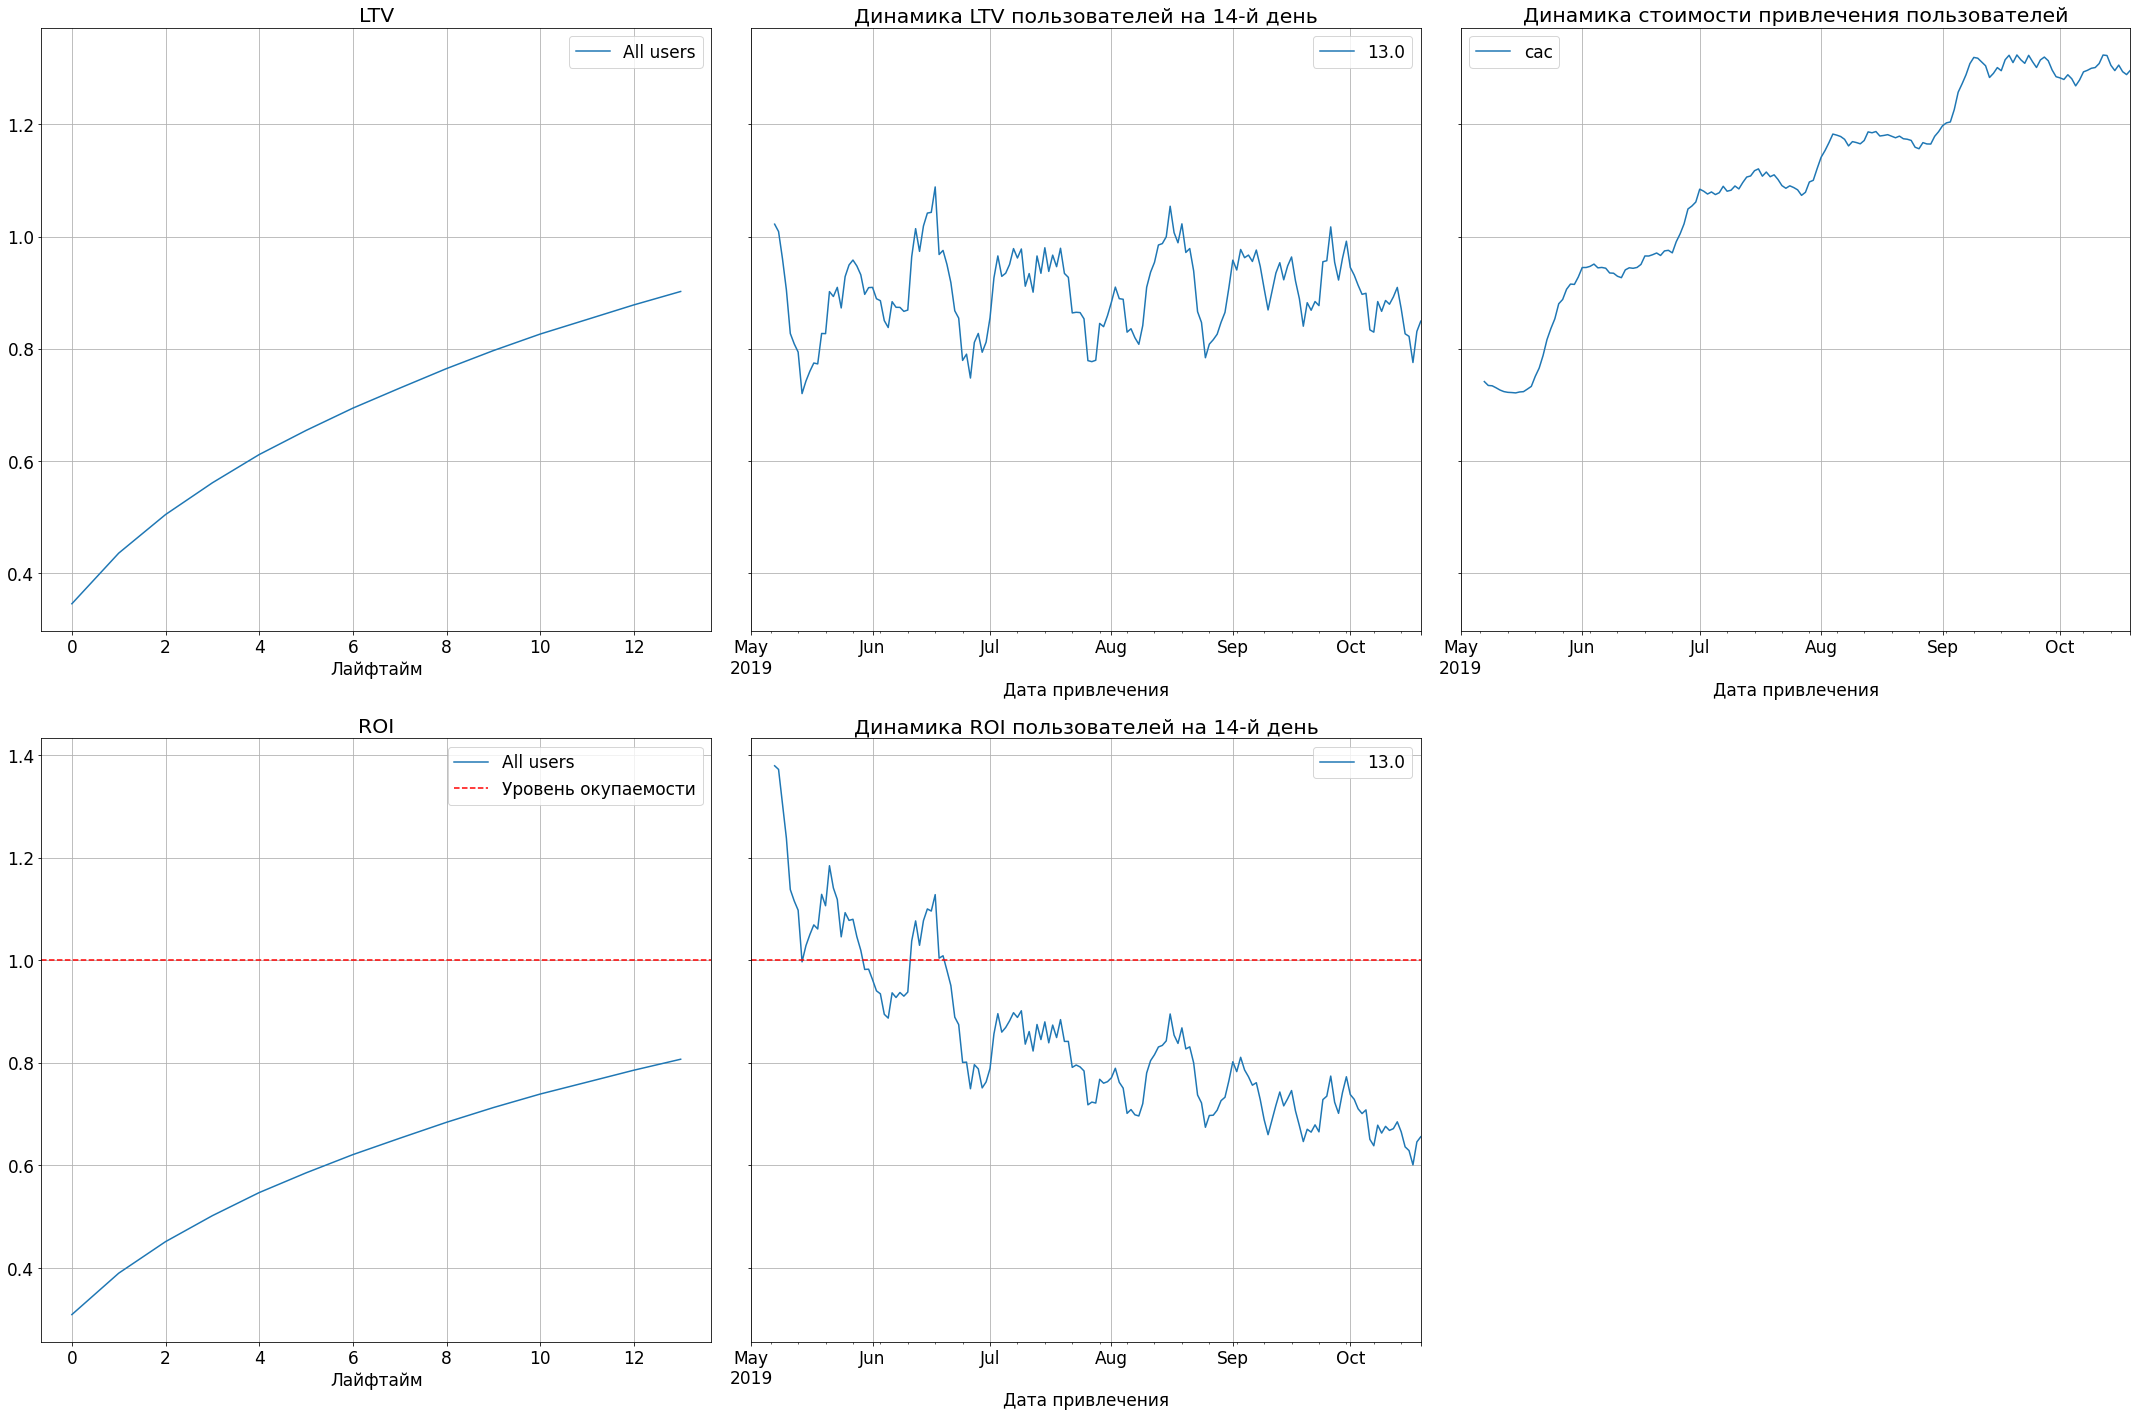

In [33]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

- Реклама перестала окупаться. С середины июня ROI падает всё больше и больше. В конце второй недели он составляет около 80%.
- CAC наоборот растёт. На рекламу увеличили расход, а пользователей не стало больше. Возможно, в этом виноват самый дорогой источник - TipTop. 
- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.

Посмотрим на динамику конверсии пользователей.

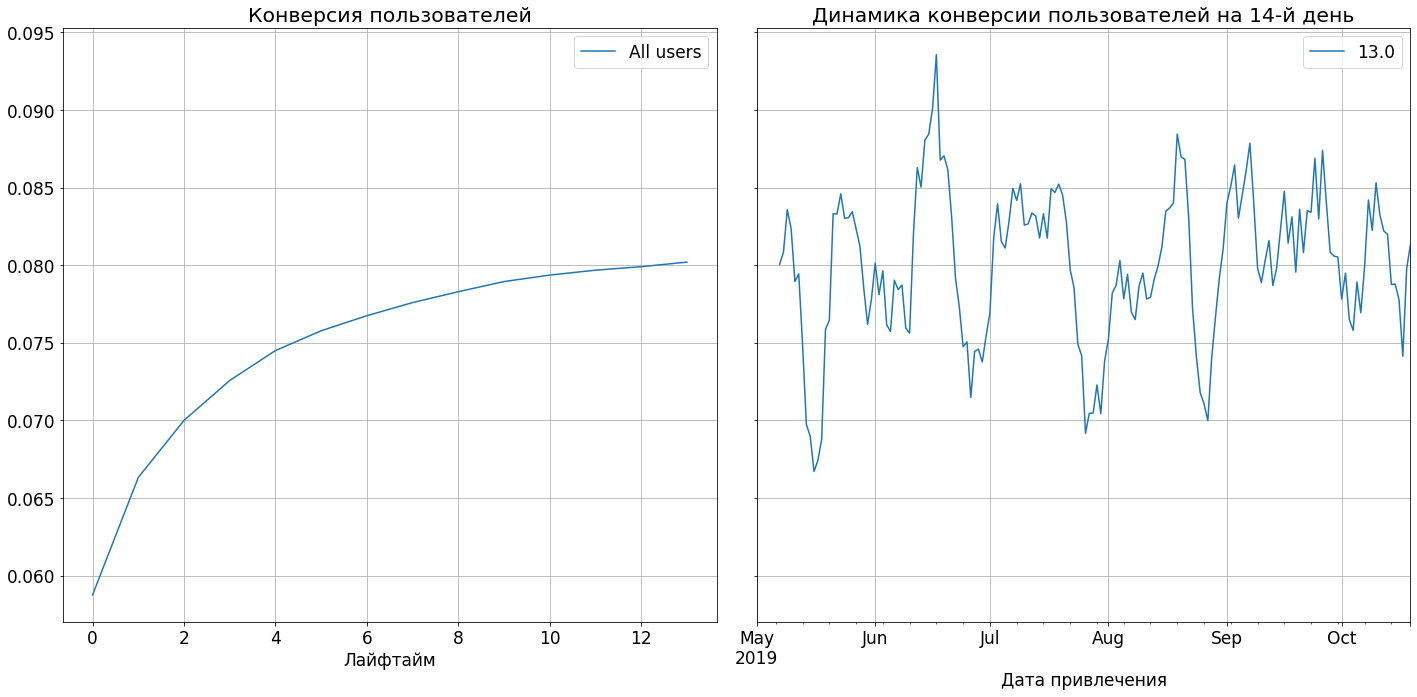

In [34]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей осталась примерно в тех же диапазонах значений.

Посмотрим удержание пользователей.

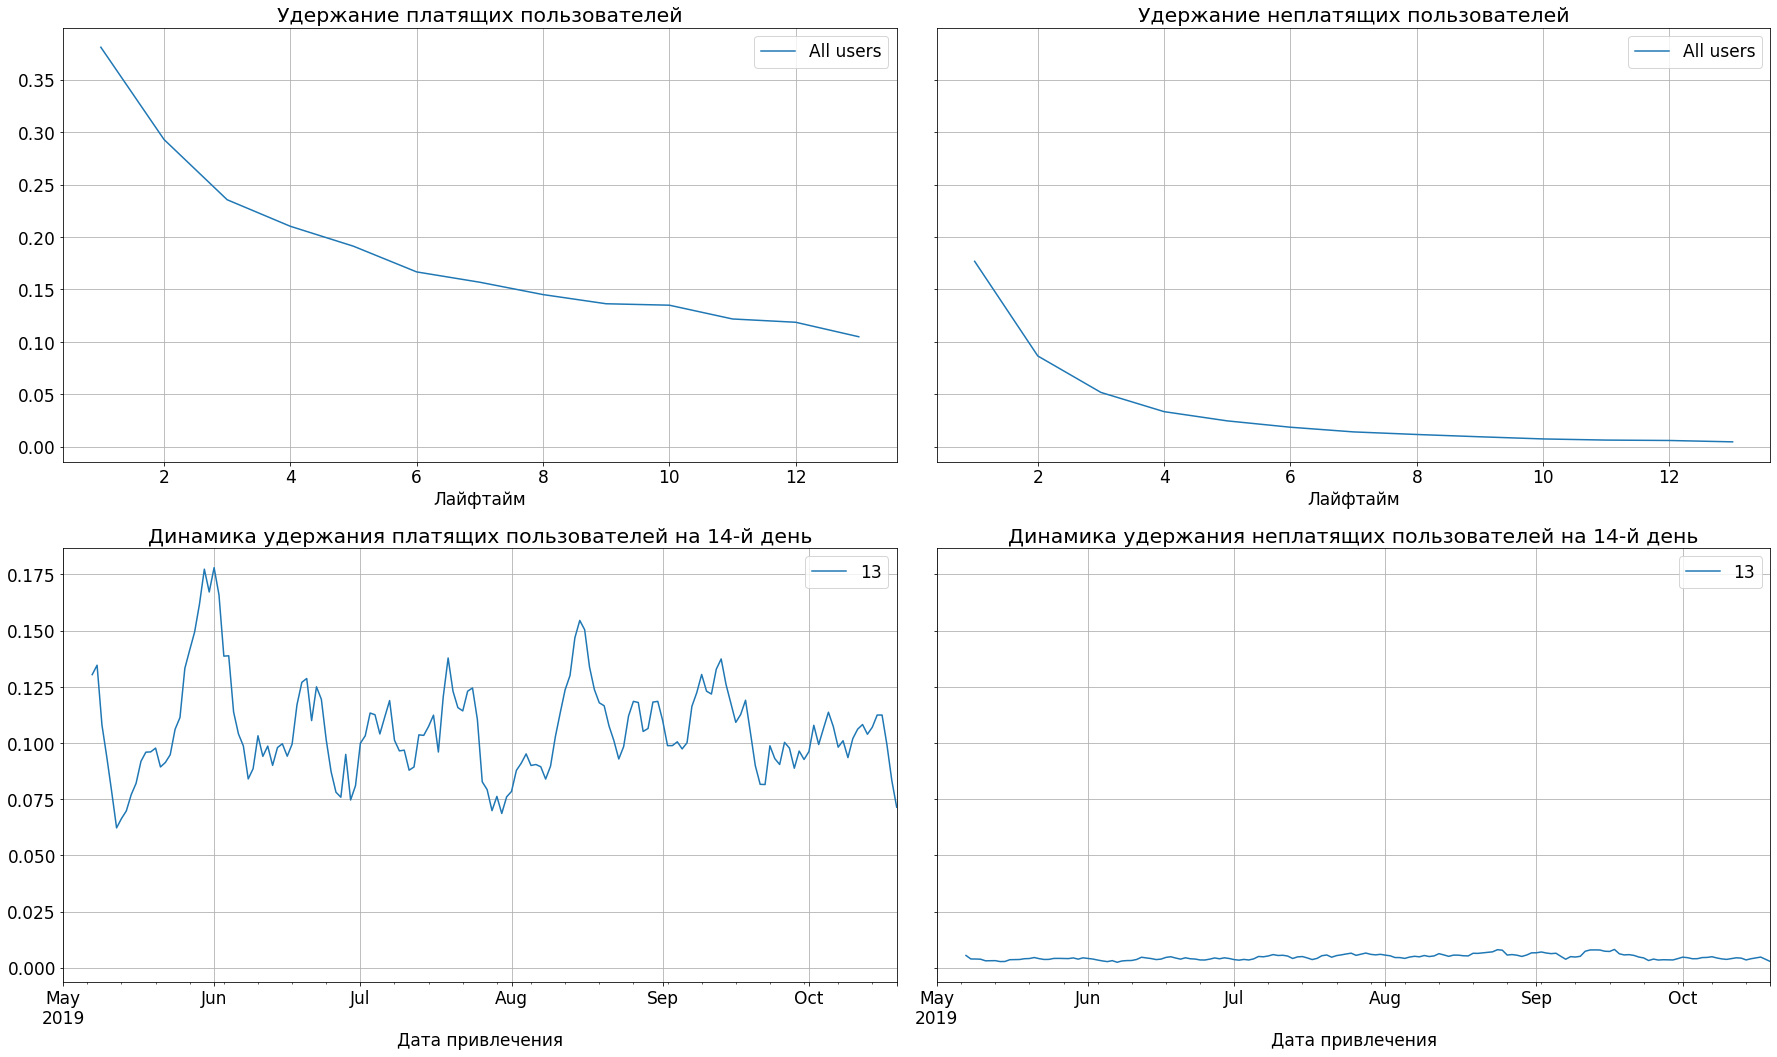

In [35]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания тоже достаточно стабильна.

Пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.

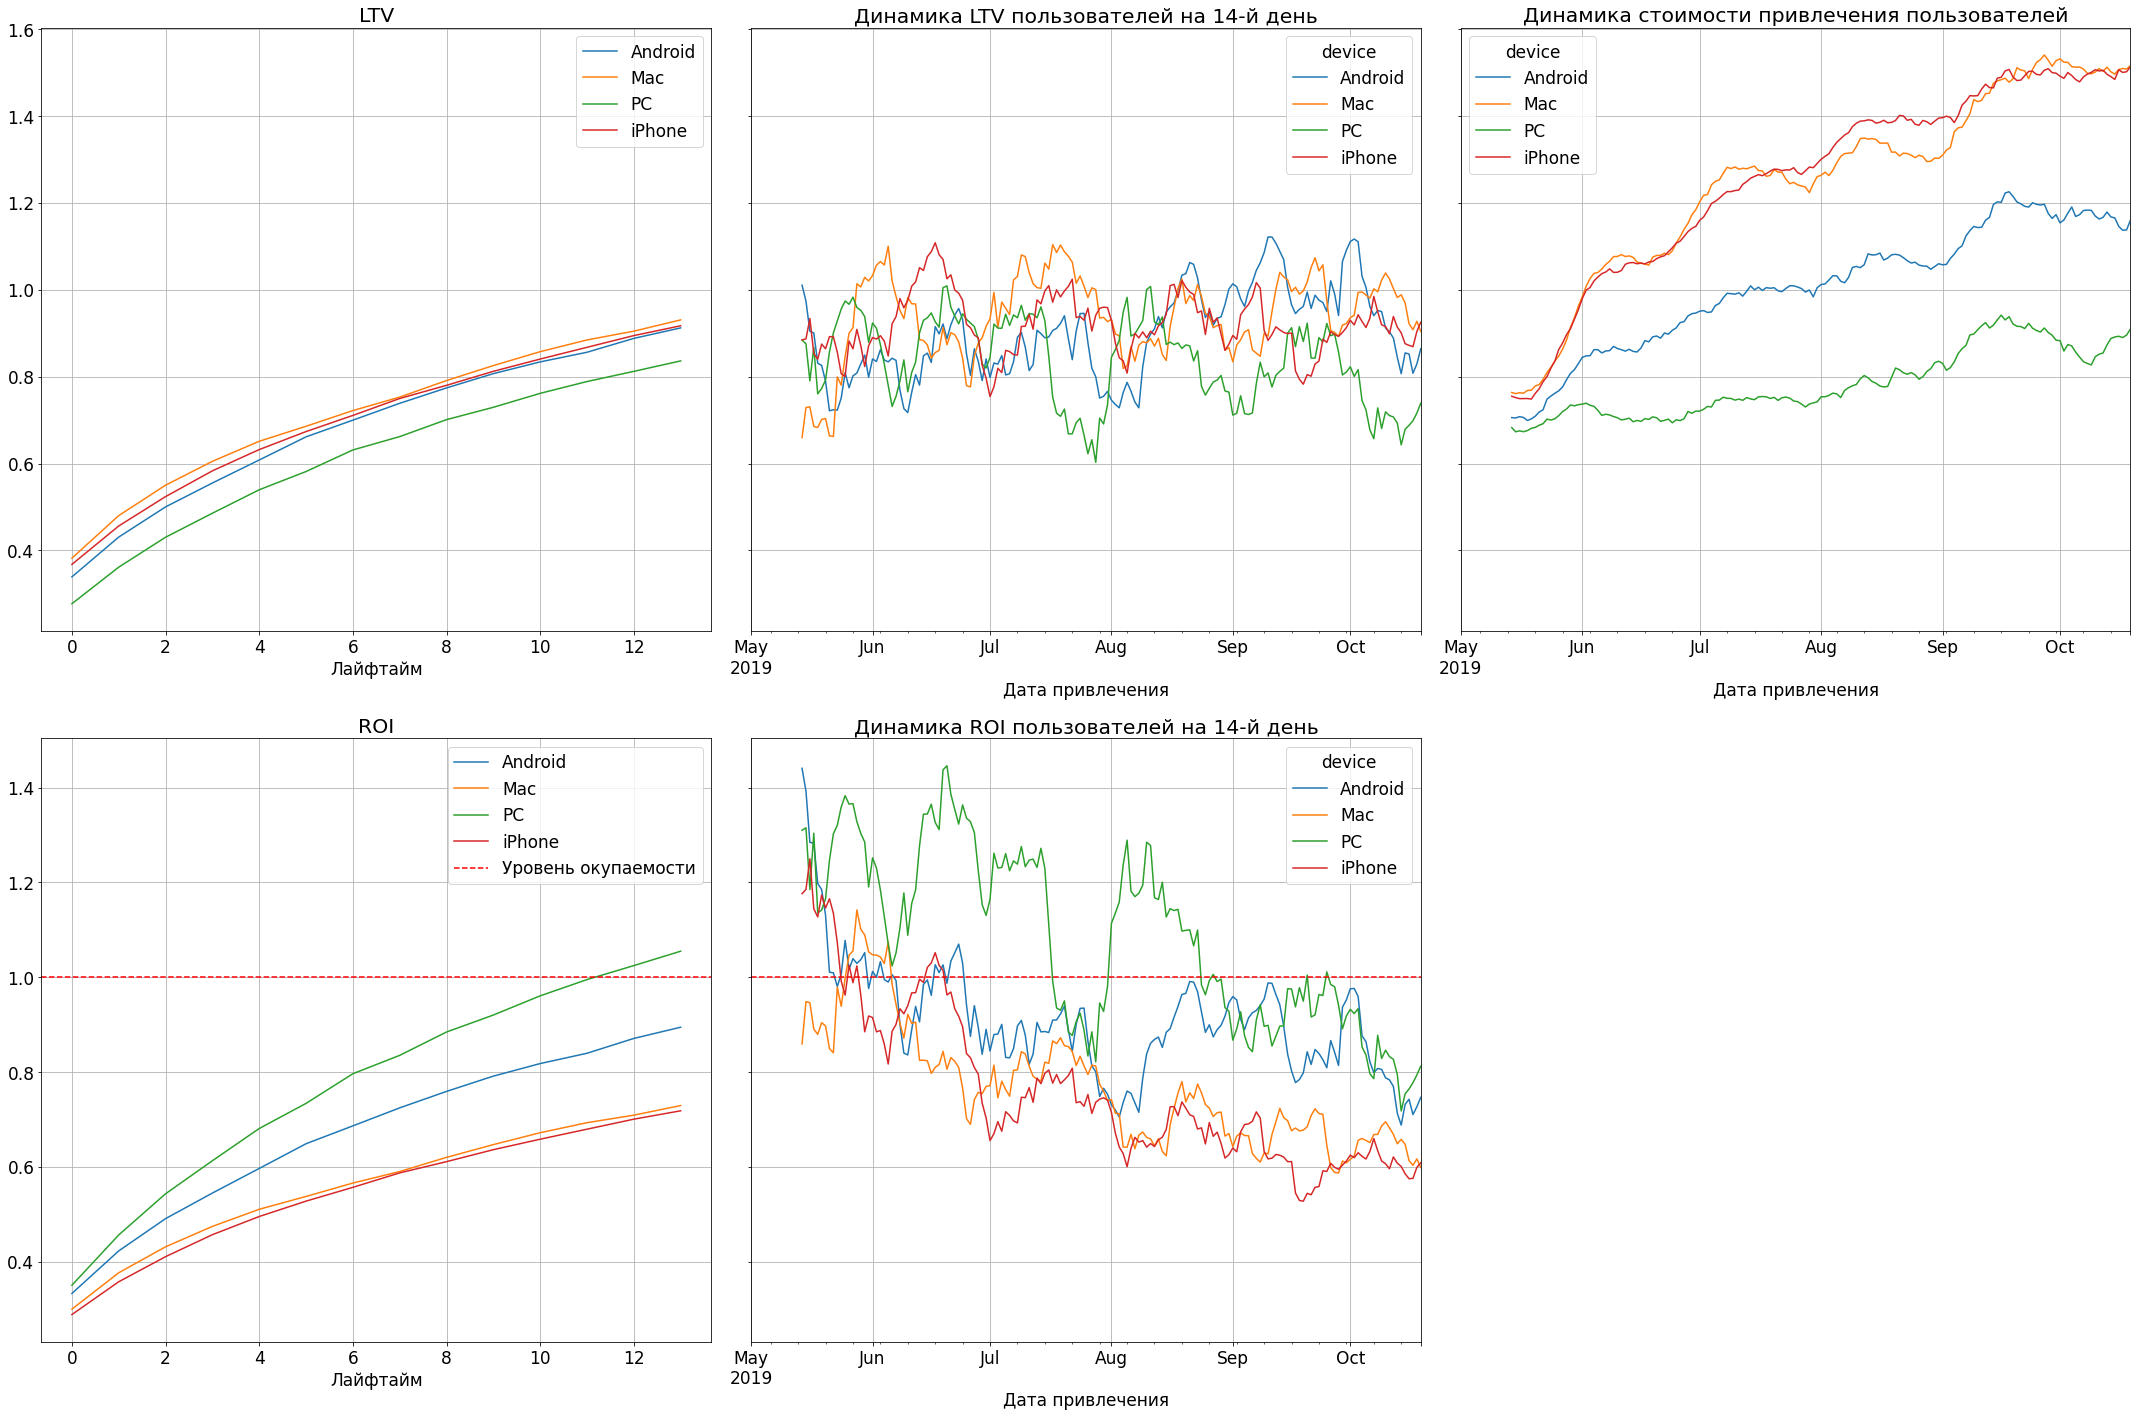

In [36]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Несмотря на то, что пожизненная ценность меньше всего у пользователей ПК, они являются наиболее эффективными с точки зрения окупаемости рекламы. У них самая дешёвая стоимость привлечения и они единственные, у кого реклама всё же окупалась хотя бы до сентября. Однако судя по графикам ROI стабильно падает, а САС растёт для всех типов устройств, значит дело не в этом.

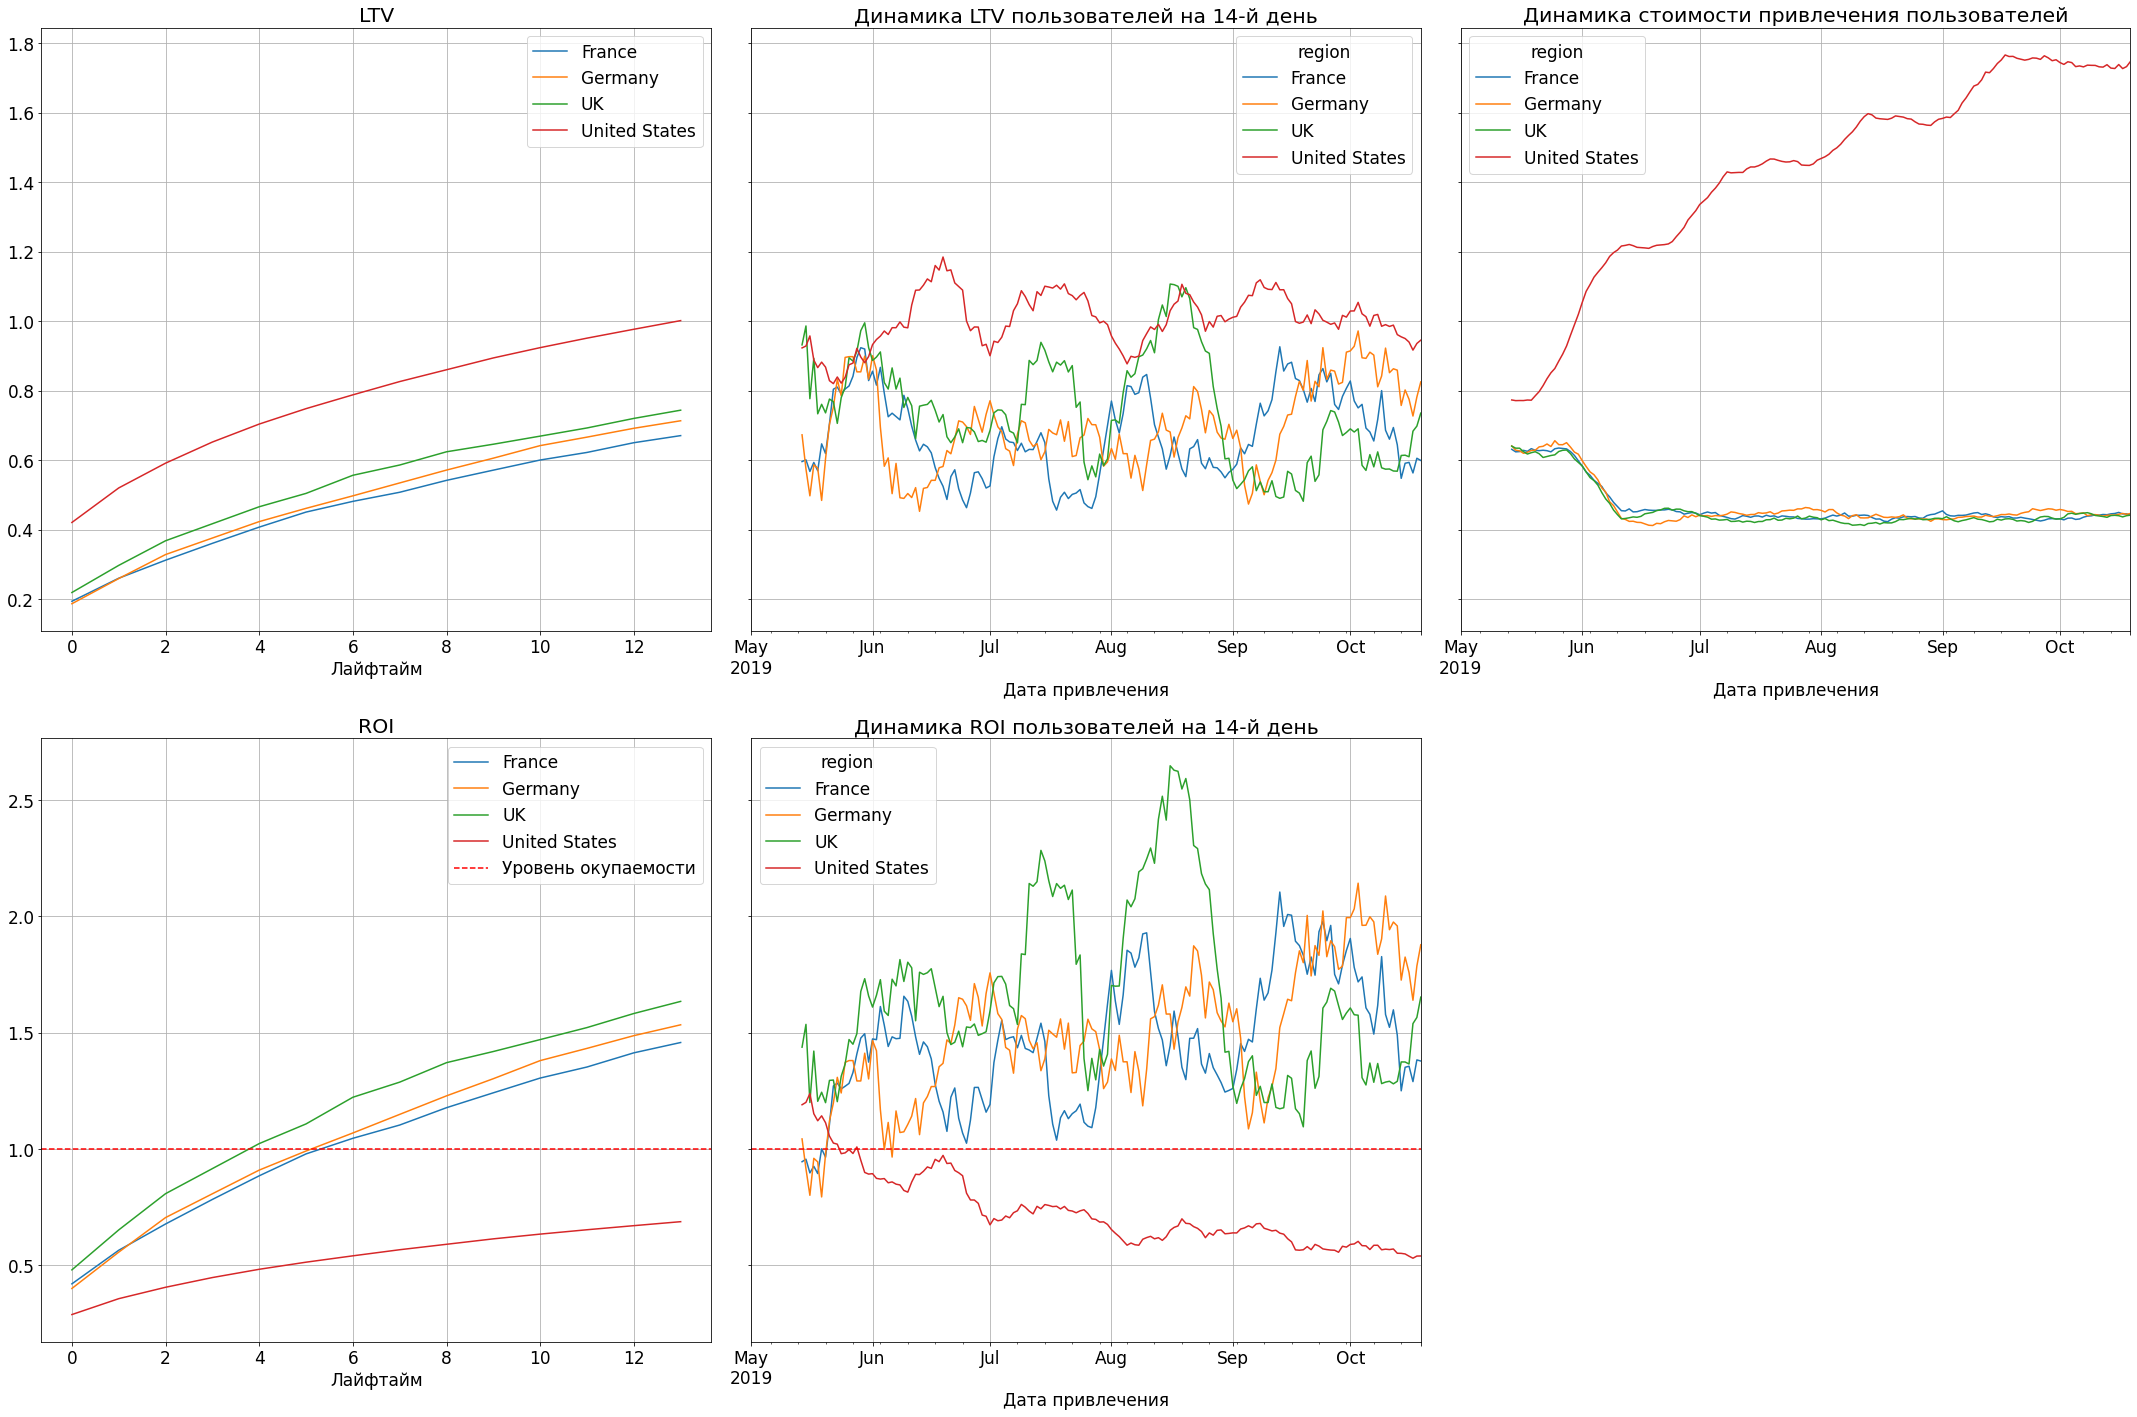

In [37]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

А вот с разбивкой по странам ситуация обратная. LTV выше всего у пользователей из США, однако у них невероятно высокий показатель CAC и они единственные, у кого ROI ниже единицы. Кажется, если убрать затраты на рекламу в США, показатели выйдут на должный уровень - в других странах CAC низкий, а реклама окупается уже через неделю.

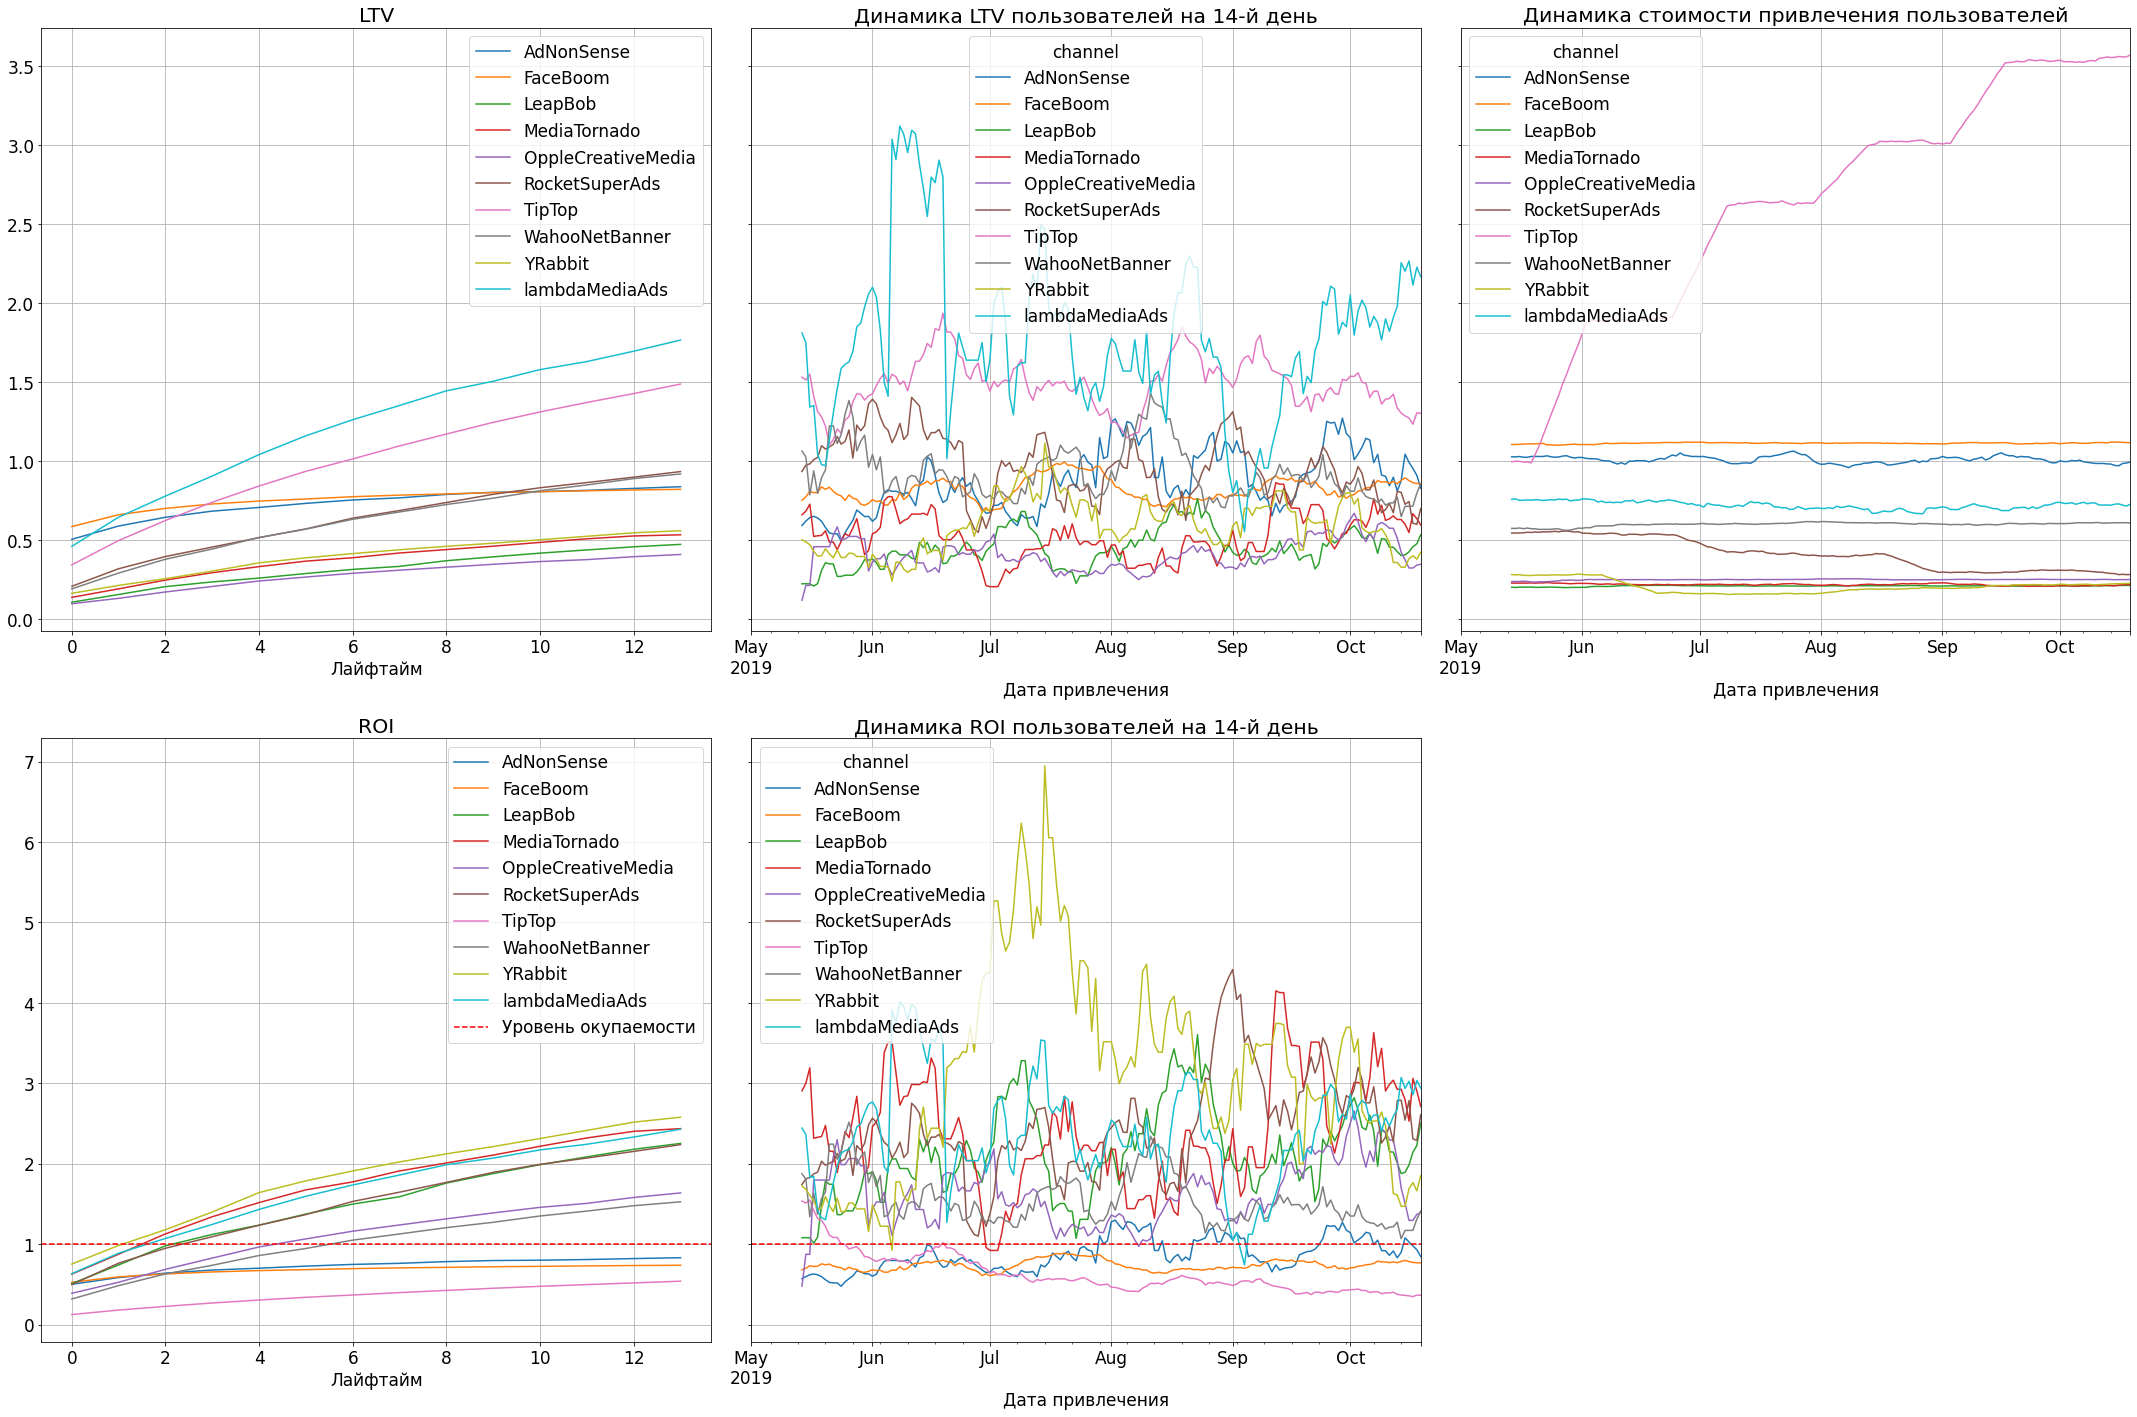

In [38]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

То же самое можно сказать про рекламу в TipTop. У неё супер дорогая стоимость привлечения пользователя, при этом она стабильно не окупается. Также рекомендуется отключить источники FaceBoom и AdNonSence.

Проверим из какой страны источники TipTop и FaceBoom.

In [39]:
profiles.query('channel == "TipTop" or channel == "FaceBoom"')['region'].unique()

array(['United States'], dtype=object)

Видимо, дело всё же не в стране, а в рекламных источниках.

Проверим конверсию и удержание с разбивкой по каналам/устройствам/источникам.

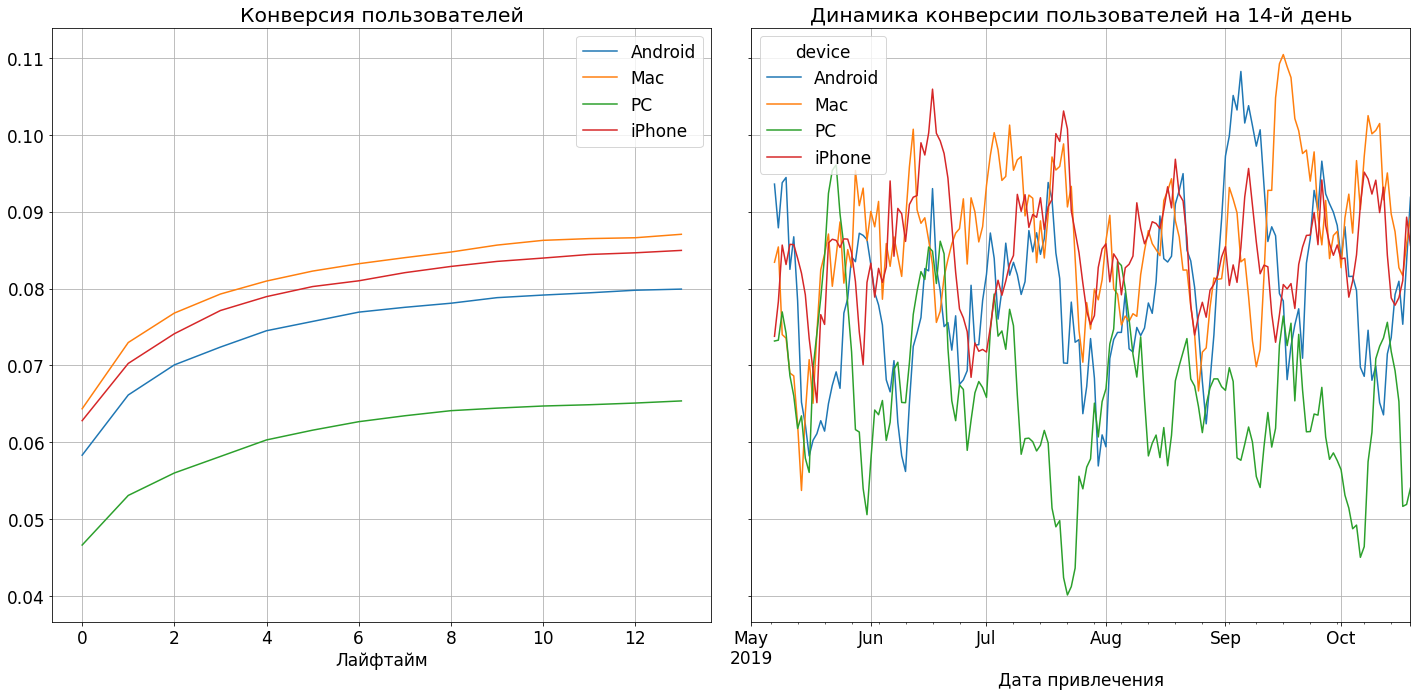

In [40]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

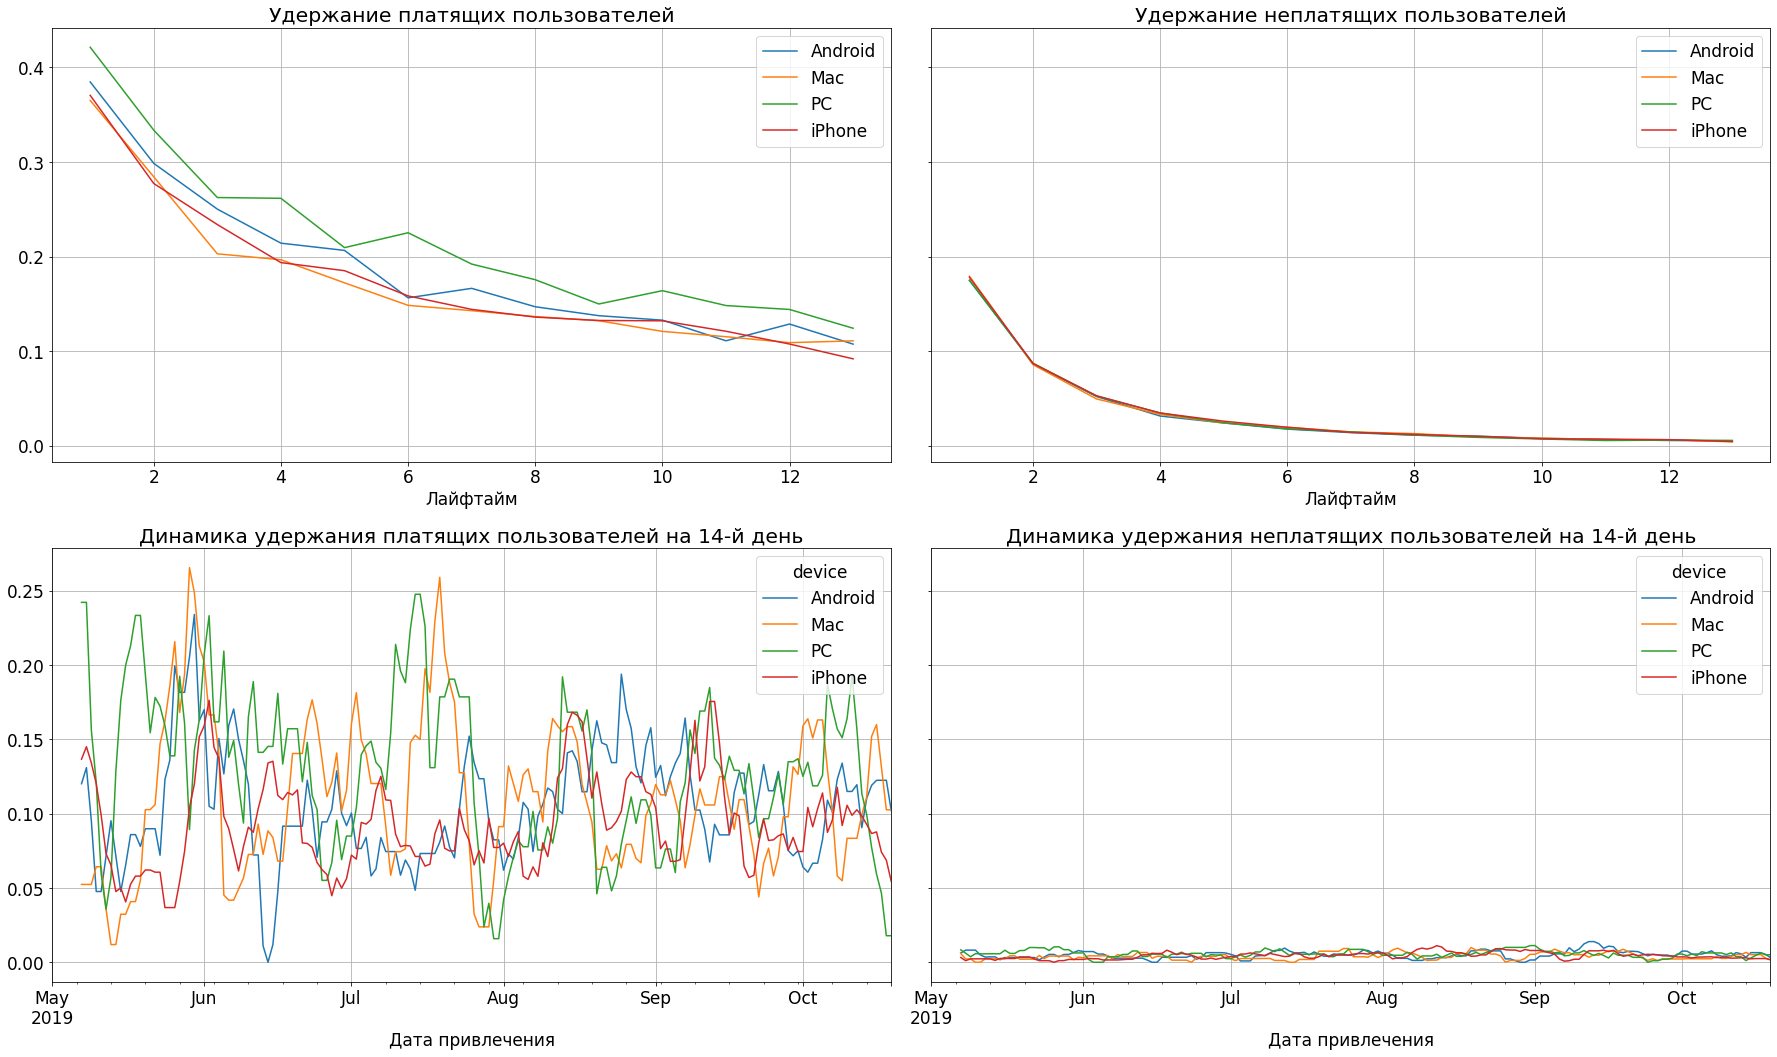

In [41]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

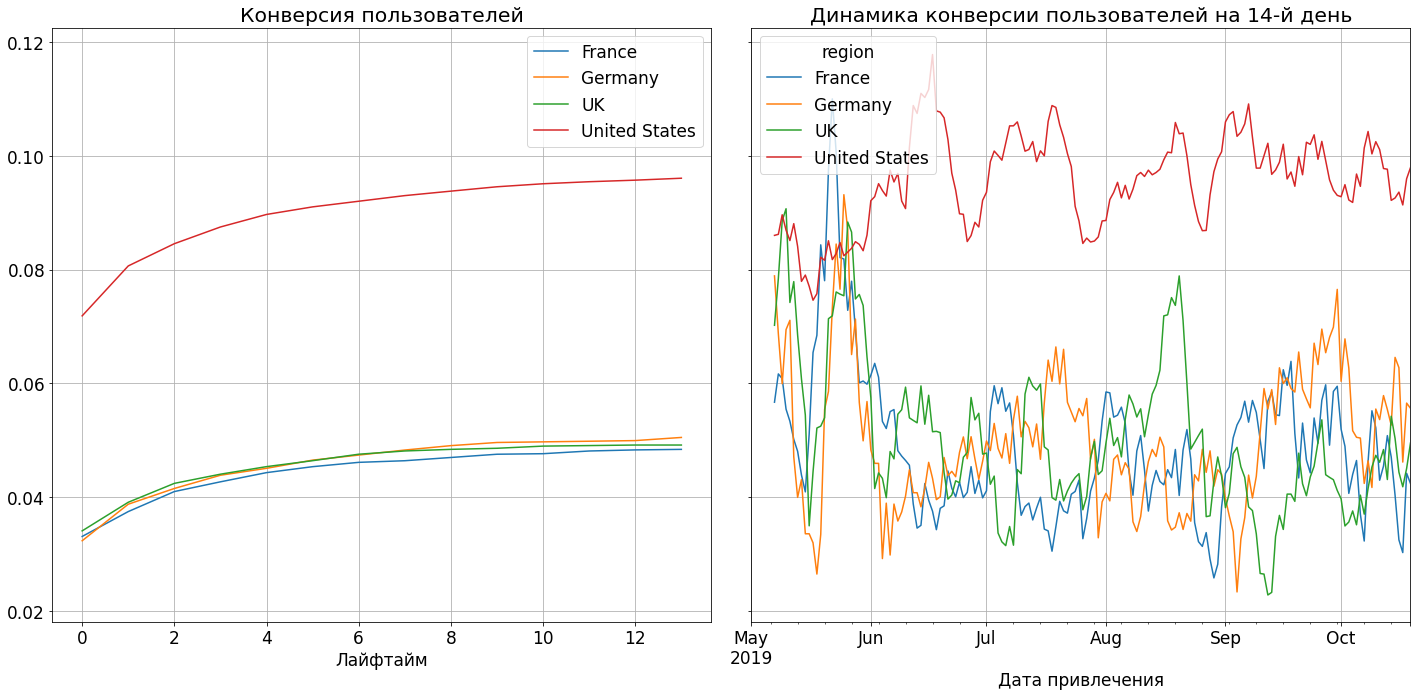

In [42]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

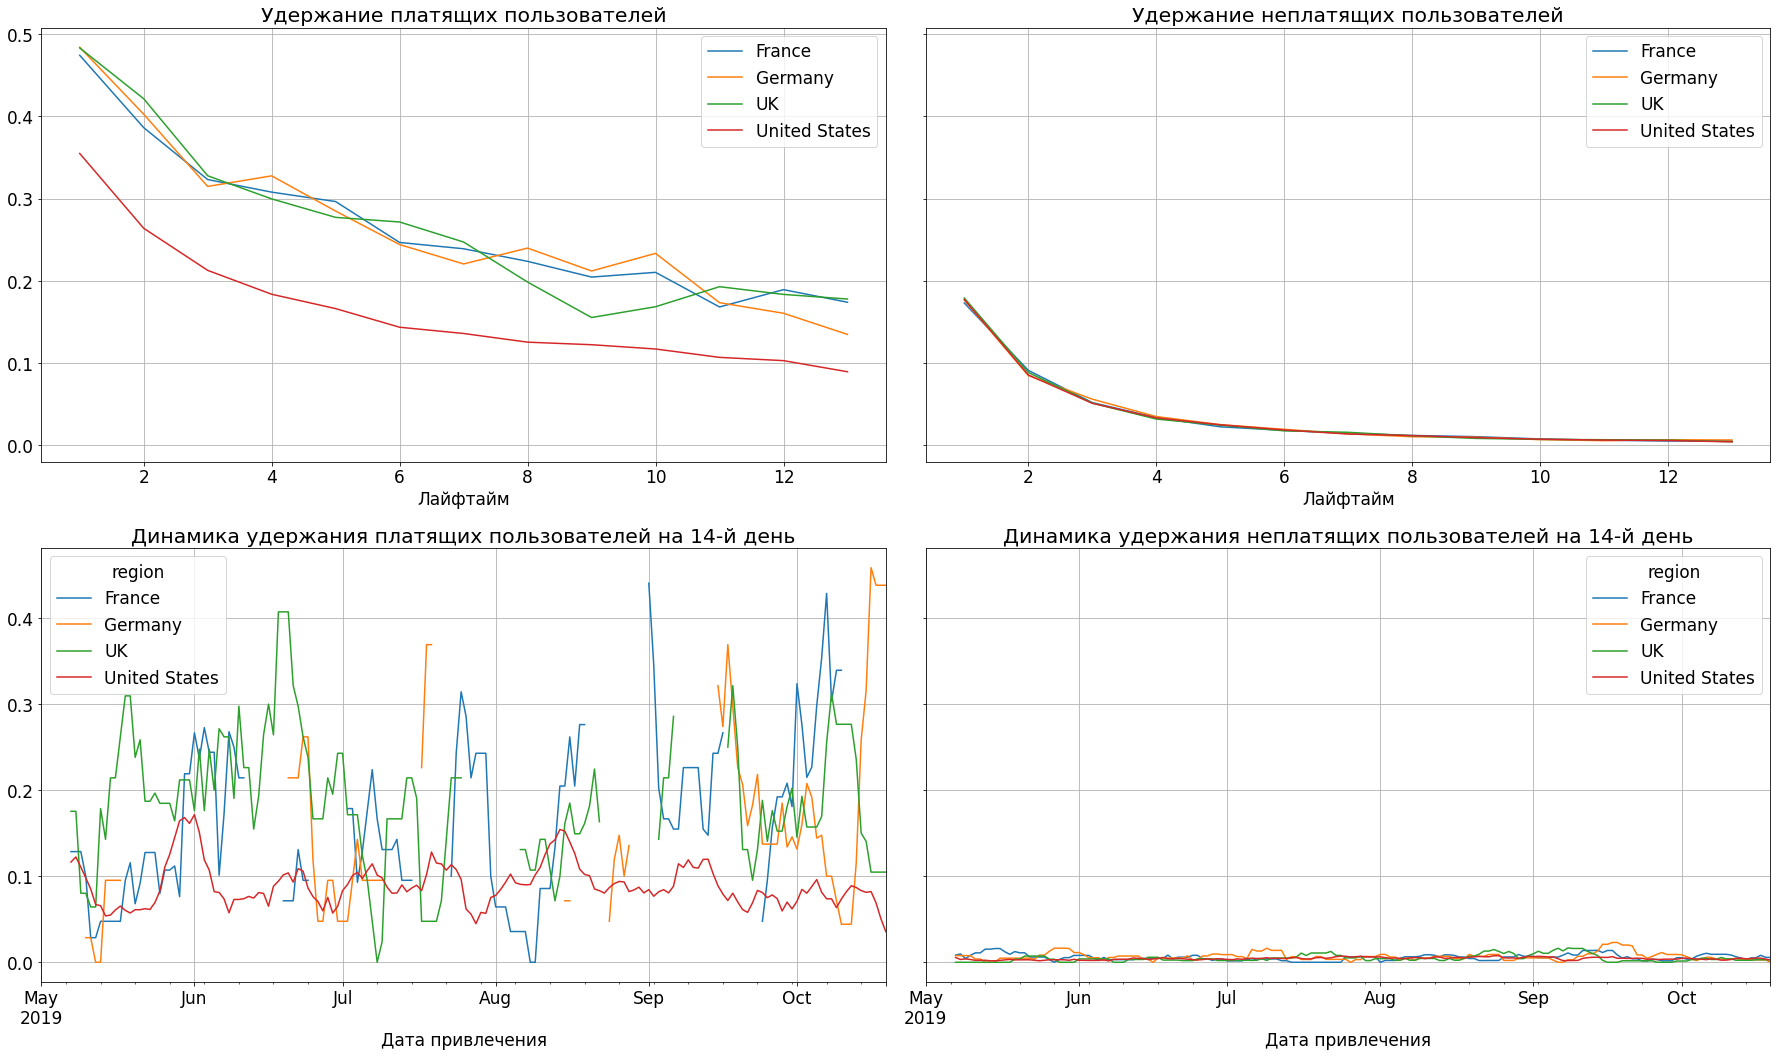

In [43]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

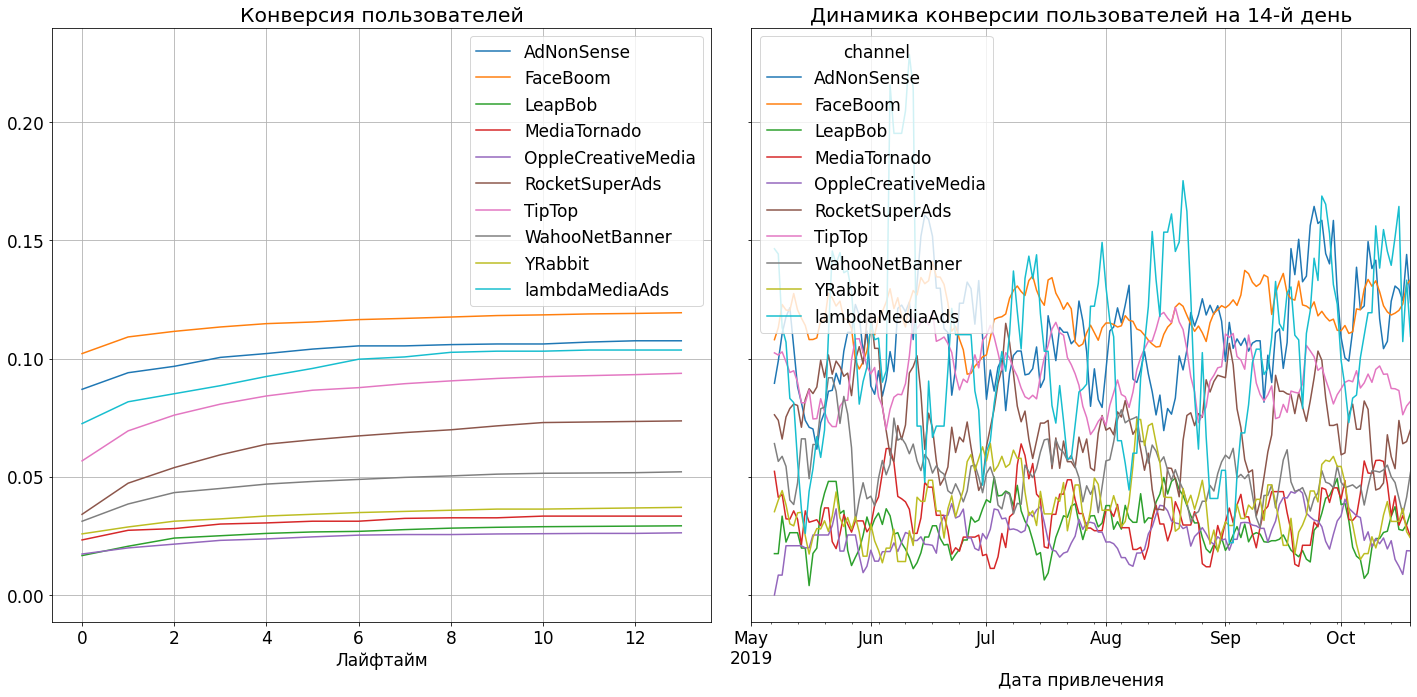

In [44]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

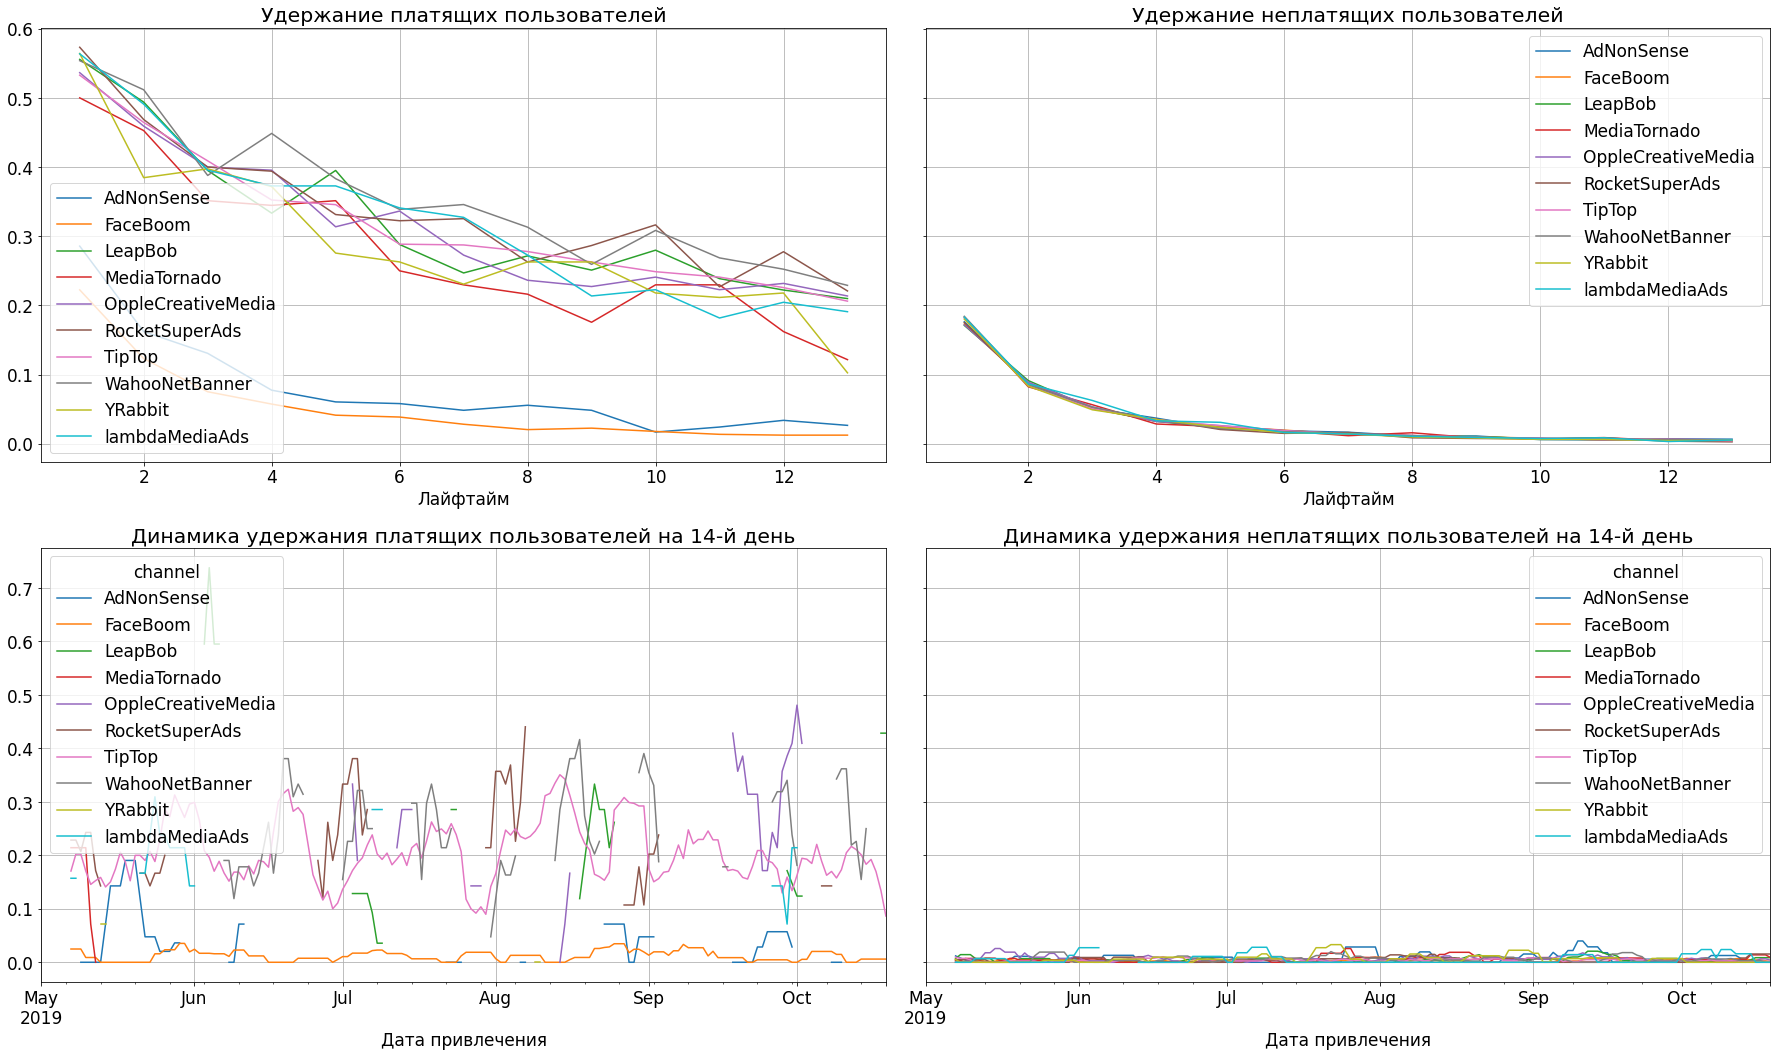

In [45]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Итак, мы наблюдаем, что:
- у пользователей ПК низкая конверсия;
- у клиентов из США высокая конверсия, но низкое удержание, что довольно подозрительно;
- высокая конверсия, но низкое удержание у пользователей из FaceBoom и AdNonSense - что также является причиной этих показателей у клиентов из США, так как FaceBoom основной источник привлечения.

Посмотрим также показатели окупаемости без "негативных источников".

In [46]:
profiles = profiles.query('channel != "TipTop" and channel != "FaceBoom" and channel != "AdNonSense"')

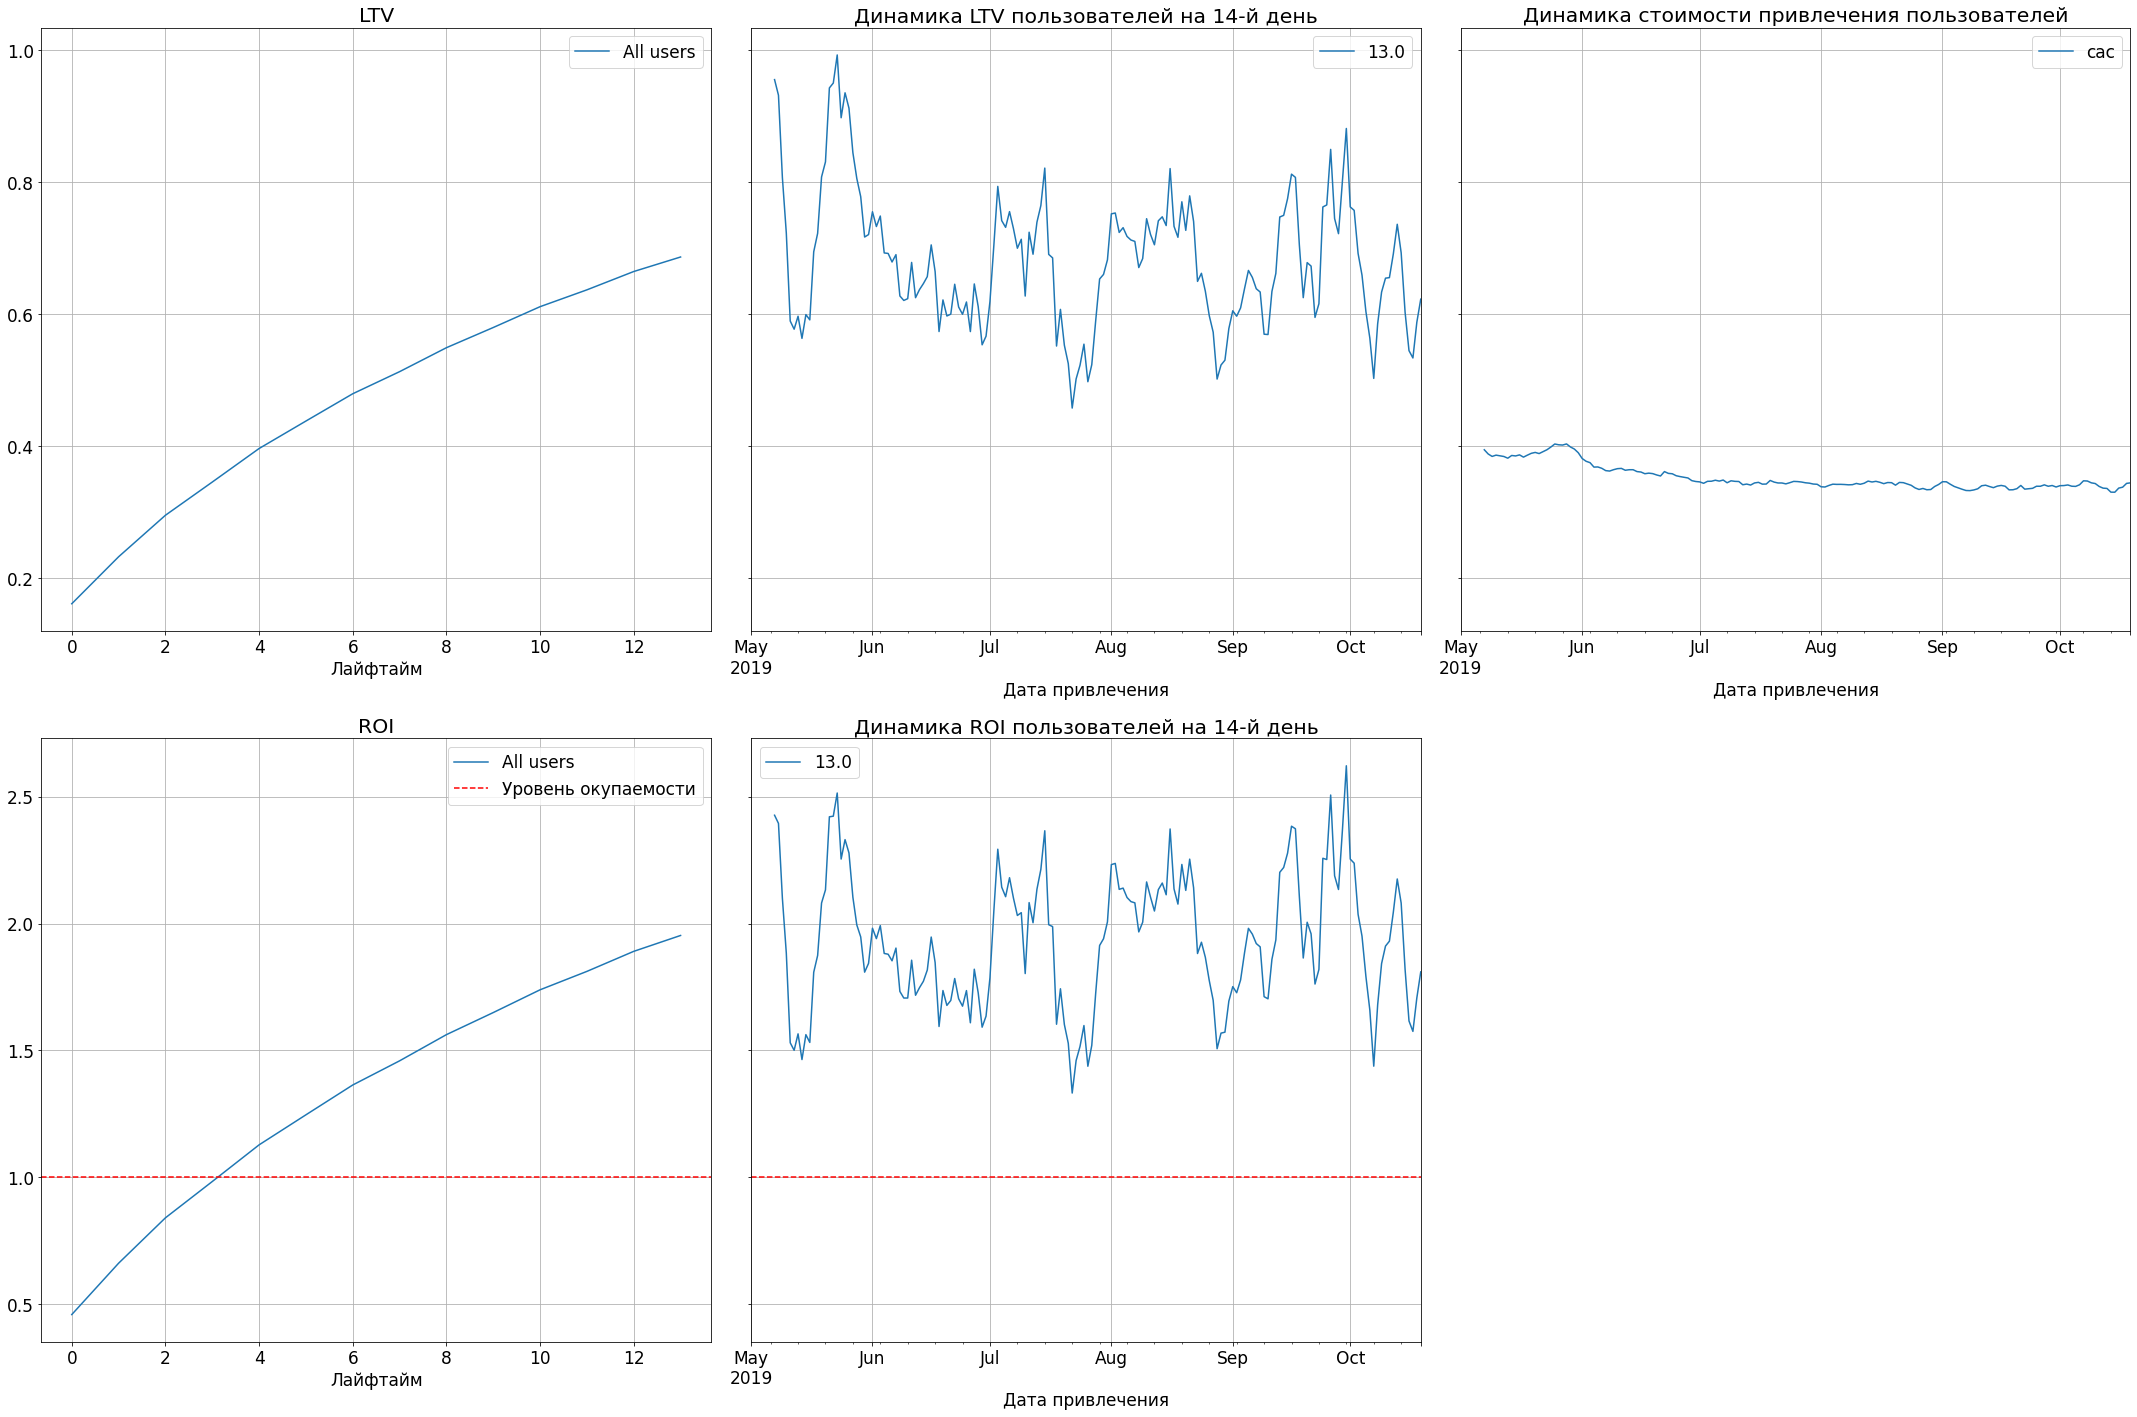

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

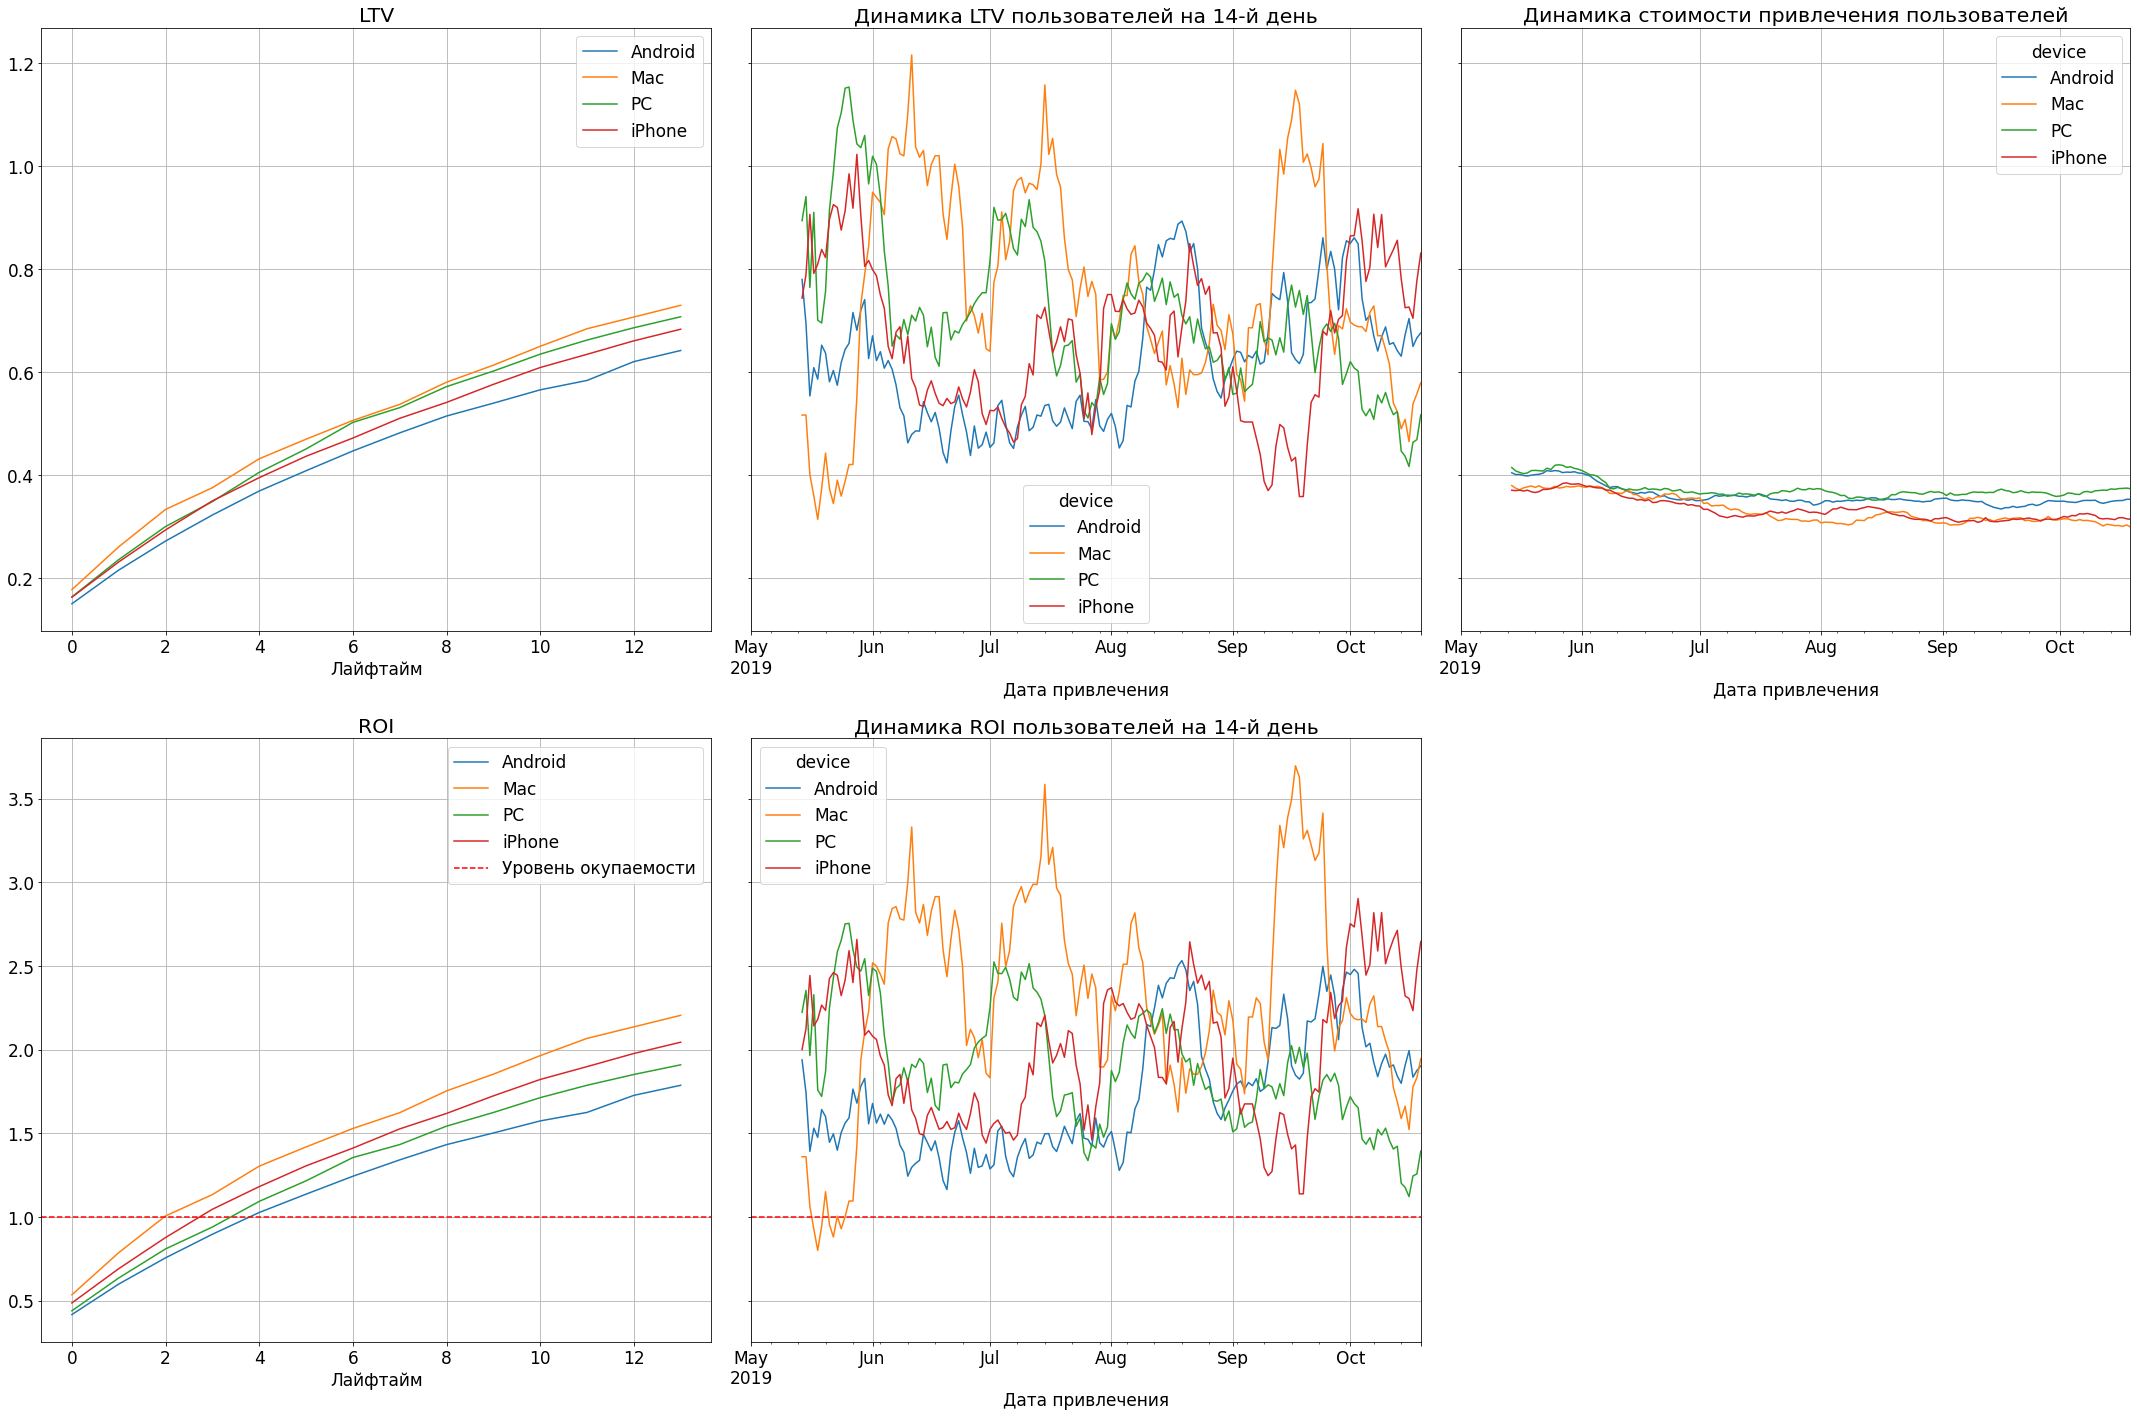

In [48]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

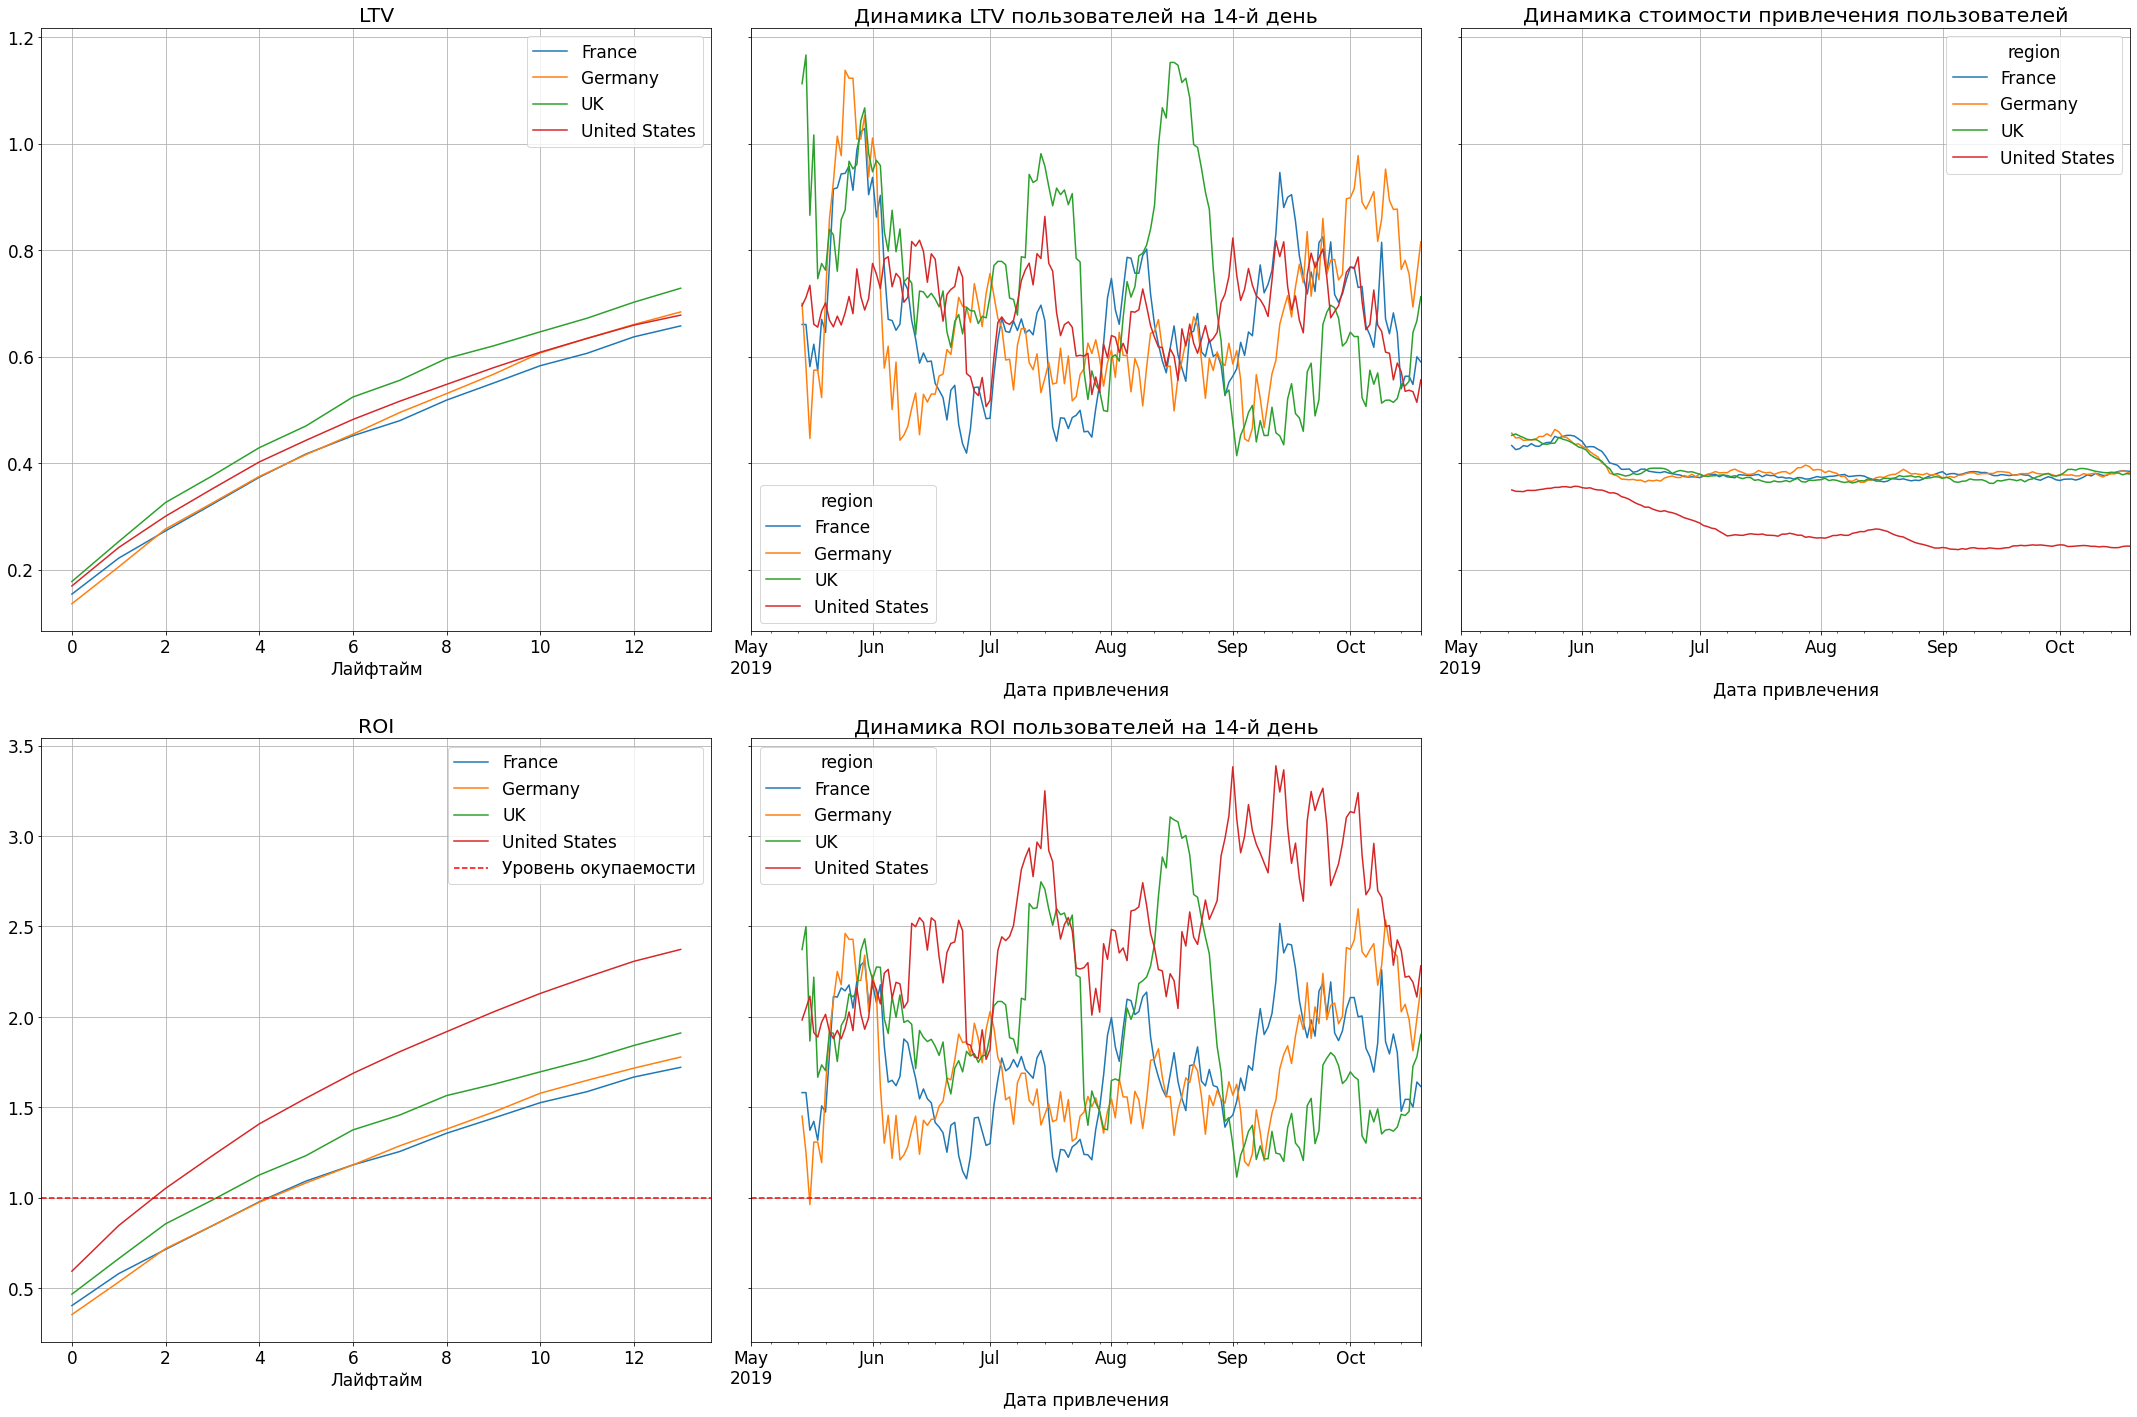

In [49]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Действительно, без этих рекламных источников реклама окупается уже примерно на 4 день для любых пользователей! И ROI на 14 день всегда был выше 100%.

Если смотреть на графики без "негативных" источников, можно сделать следующие выводы:
- в общем по всем пользователям CAC падает, а ROI растёт;
- с точки зрения окупаемости выгоднее всего пользователи макбуков - у них достаточно низкий показатель CAC и самый высокий показатель ROI;
- в разбивке по странам явным лидером является США - у них в разы выше ROI и ниже CAC в отличии от других стран.

Посмотрим также отдельно на показатели клиентов из США и из Европы без "негативных" источников с разбивкой по каналам, чтобы дать рекомендации отделу маркетинга.

In [50]:
profiles_usa = profiles.query('region == "United States"')

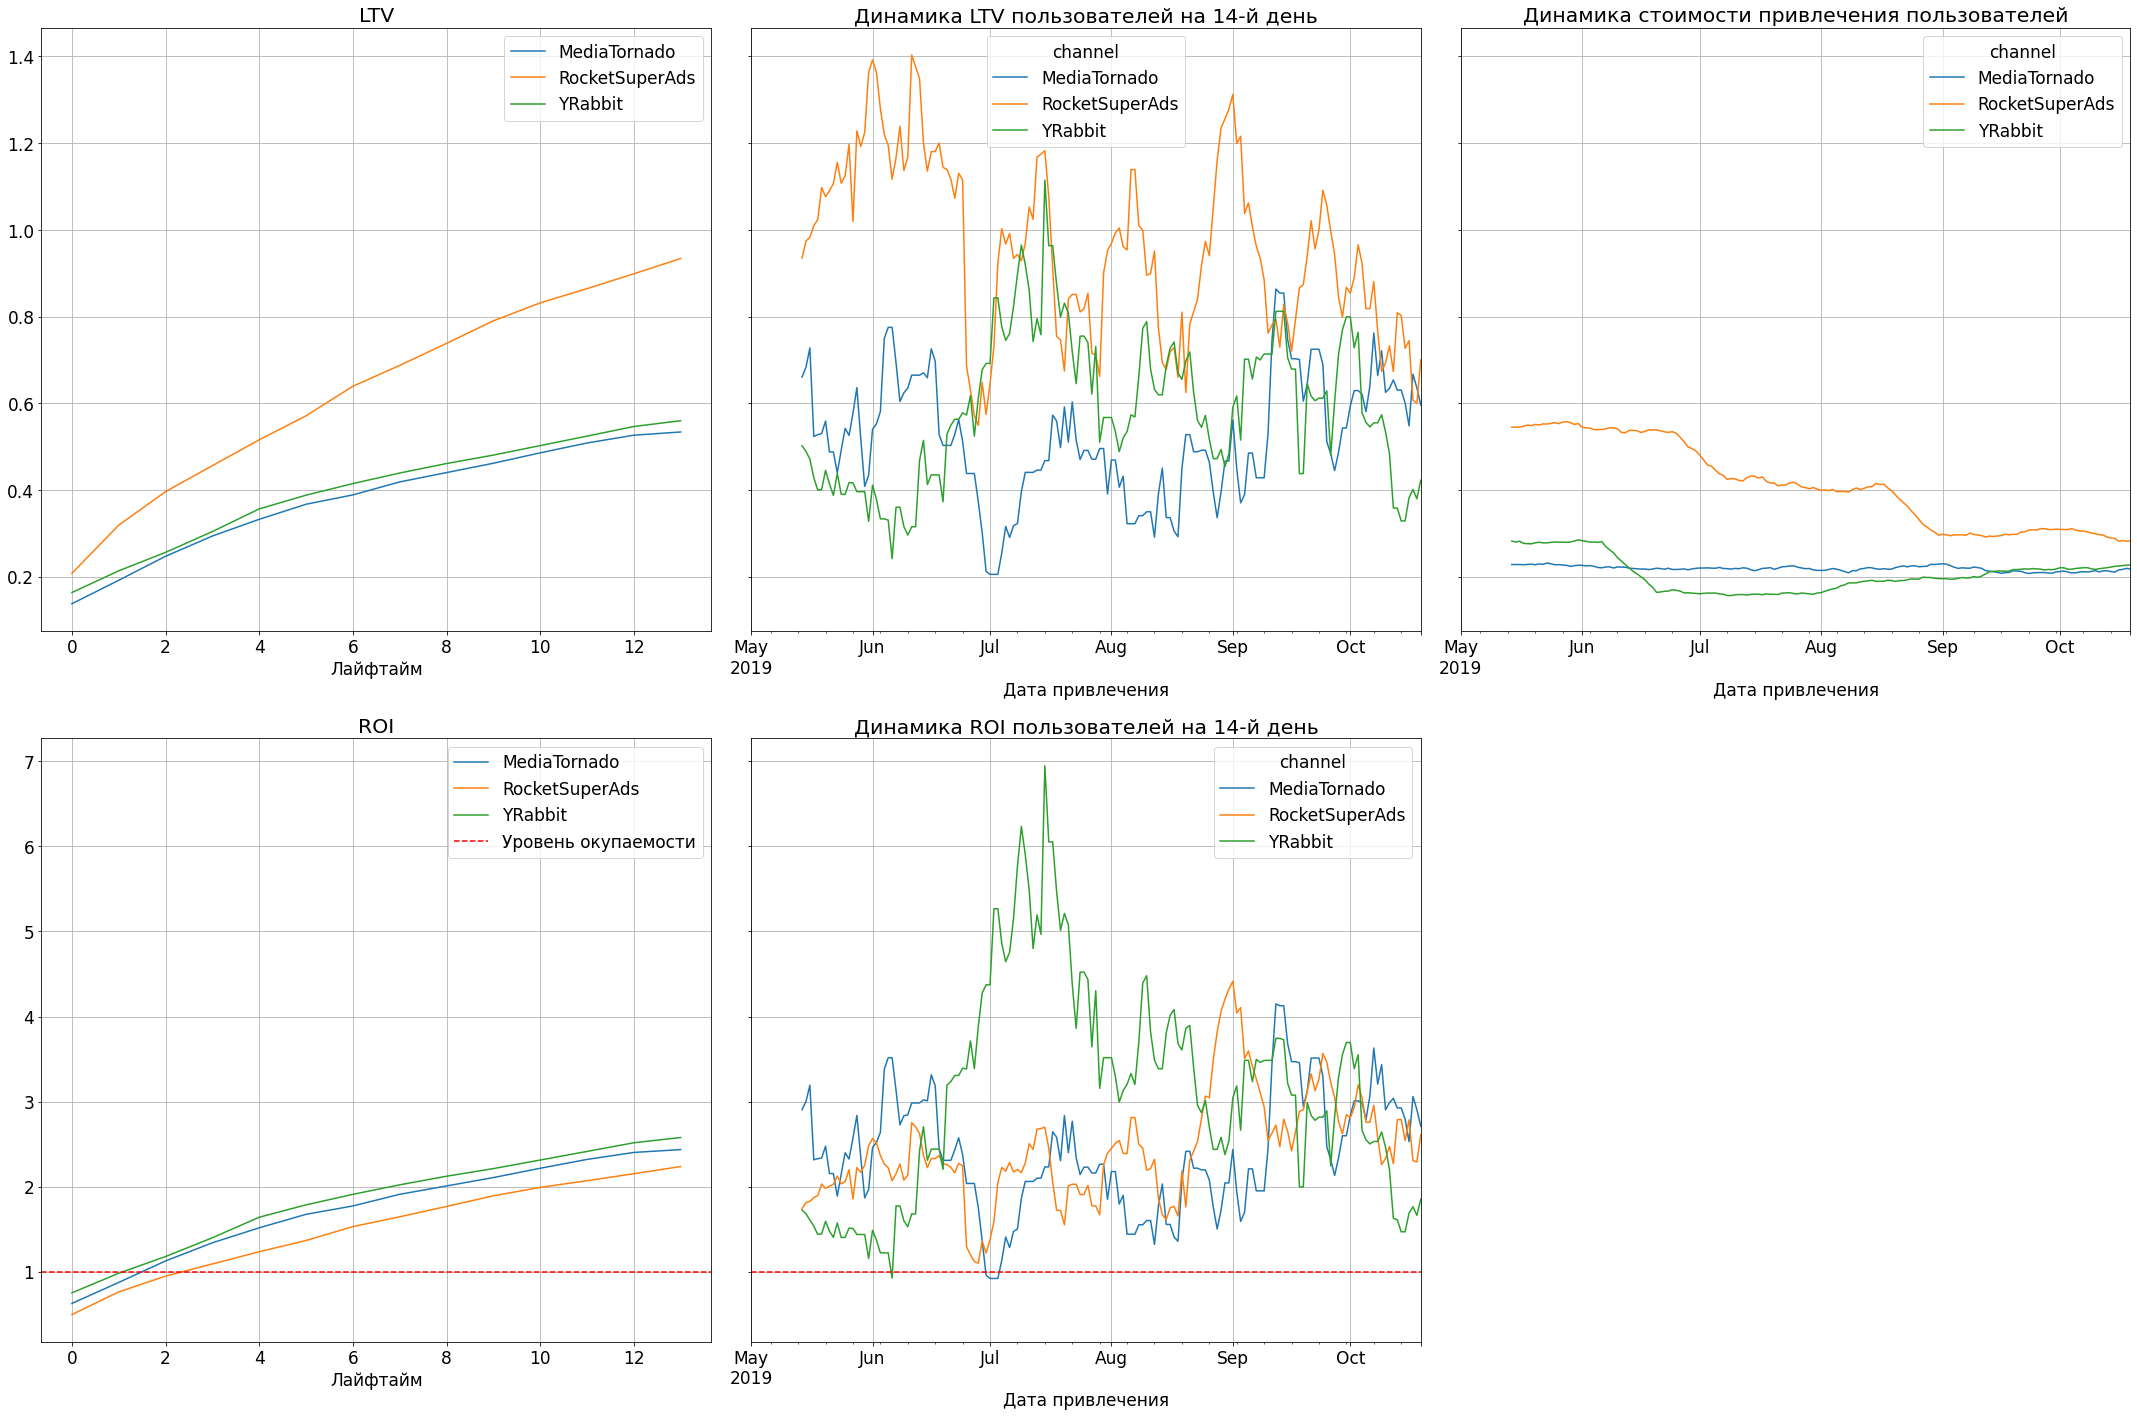

In [51]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пока что наиболее эффективным с точки зрения окупаемости является канал YRabbit.
Посмотрим на показатели конверсии и удержания.

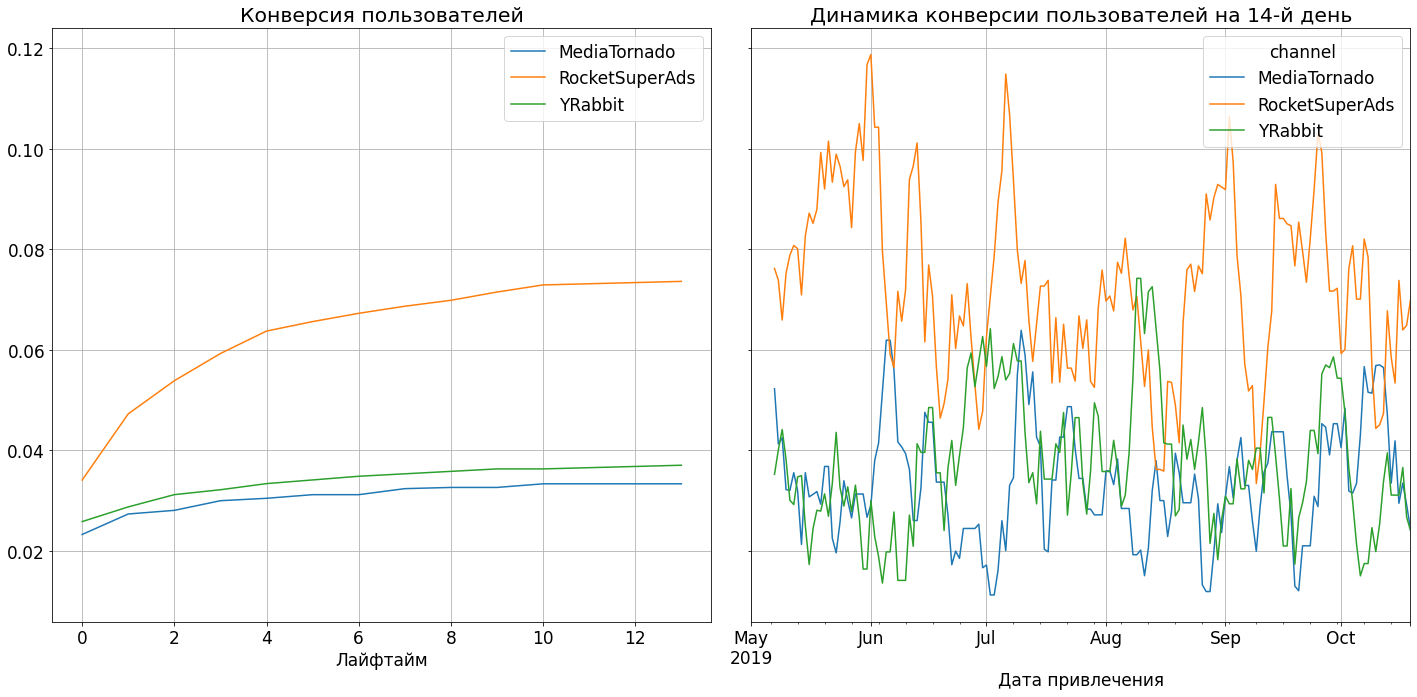

In [52]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

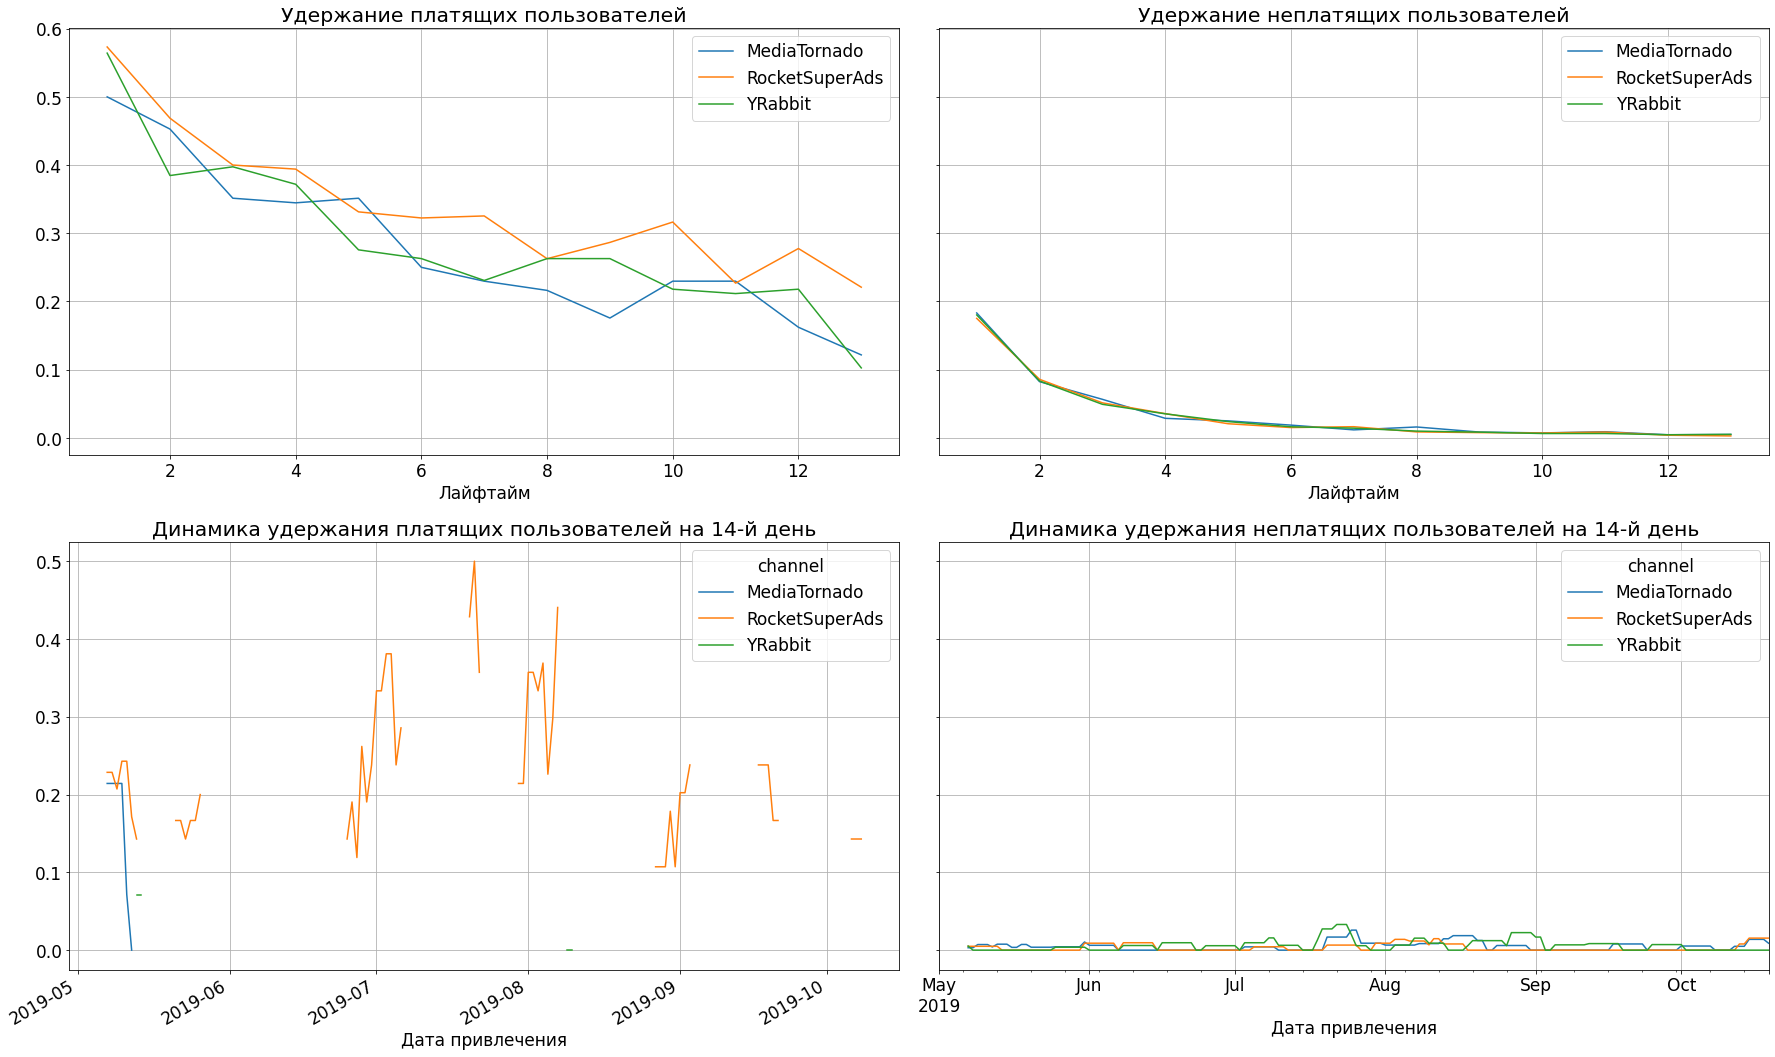

In [53]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А вот показатели конверсии и удержания для этого канала не очень. Удержания почти нет. То же самое можно сказать про источник MediaTornado. Таким образом, для американского рынка эффективным каналом будет только RocketSuperAds. 

In [54]:
profiles_europe = profiles.query('region != "United States"')

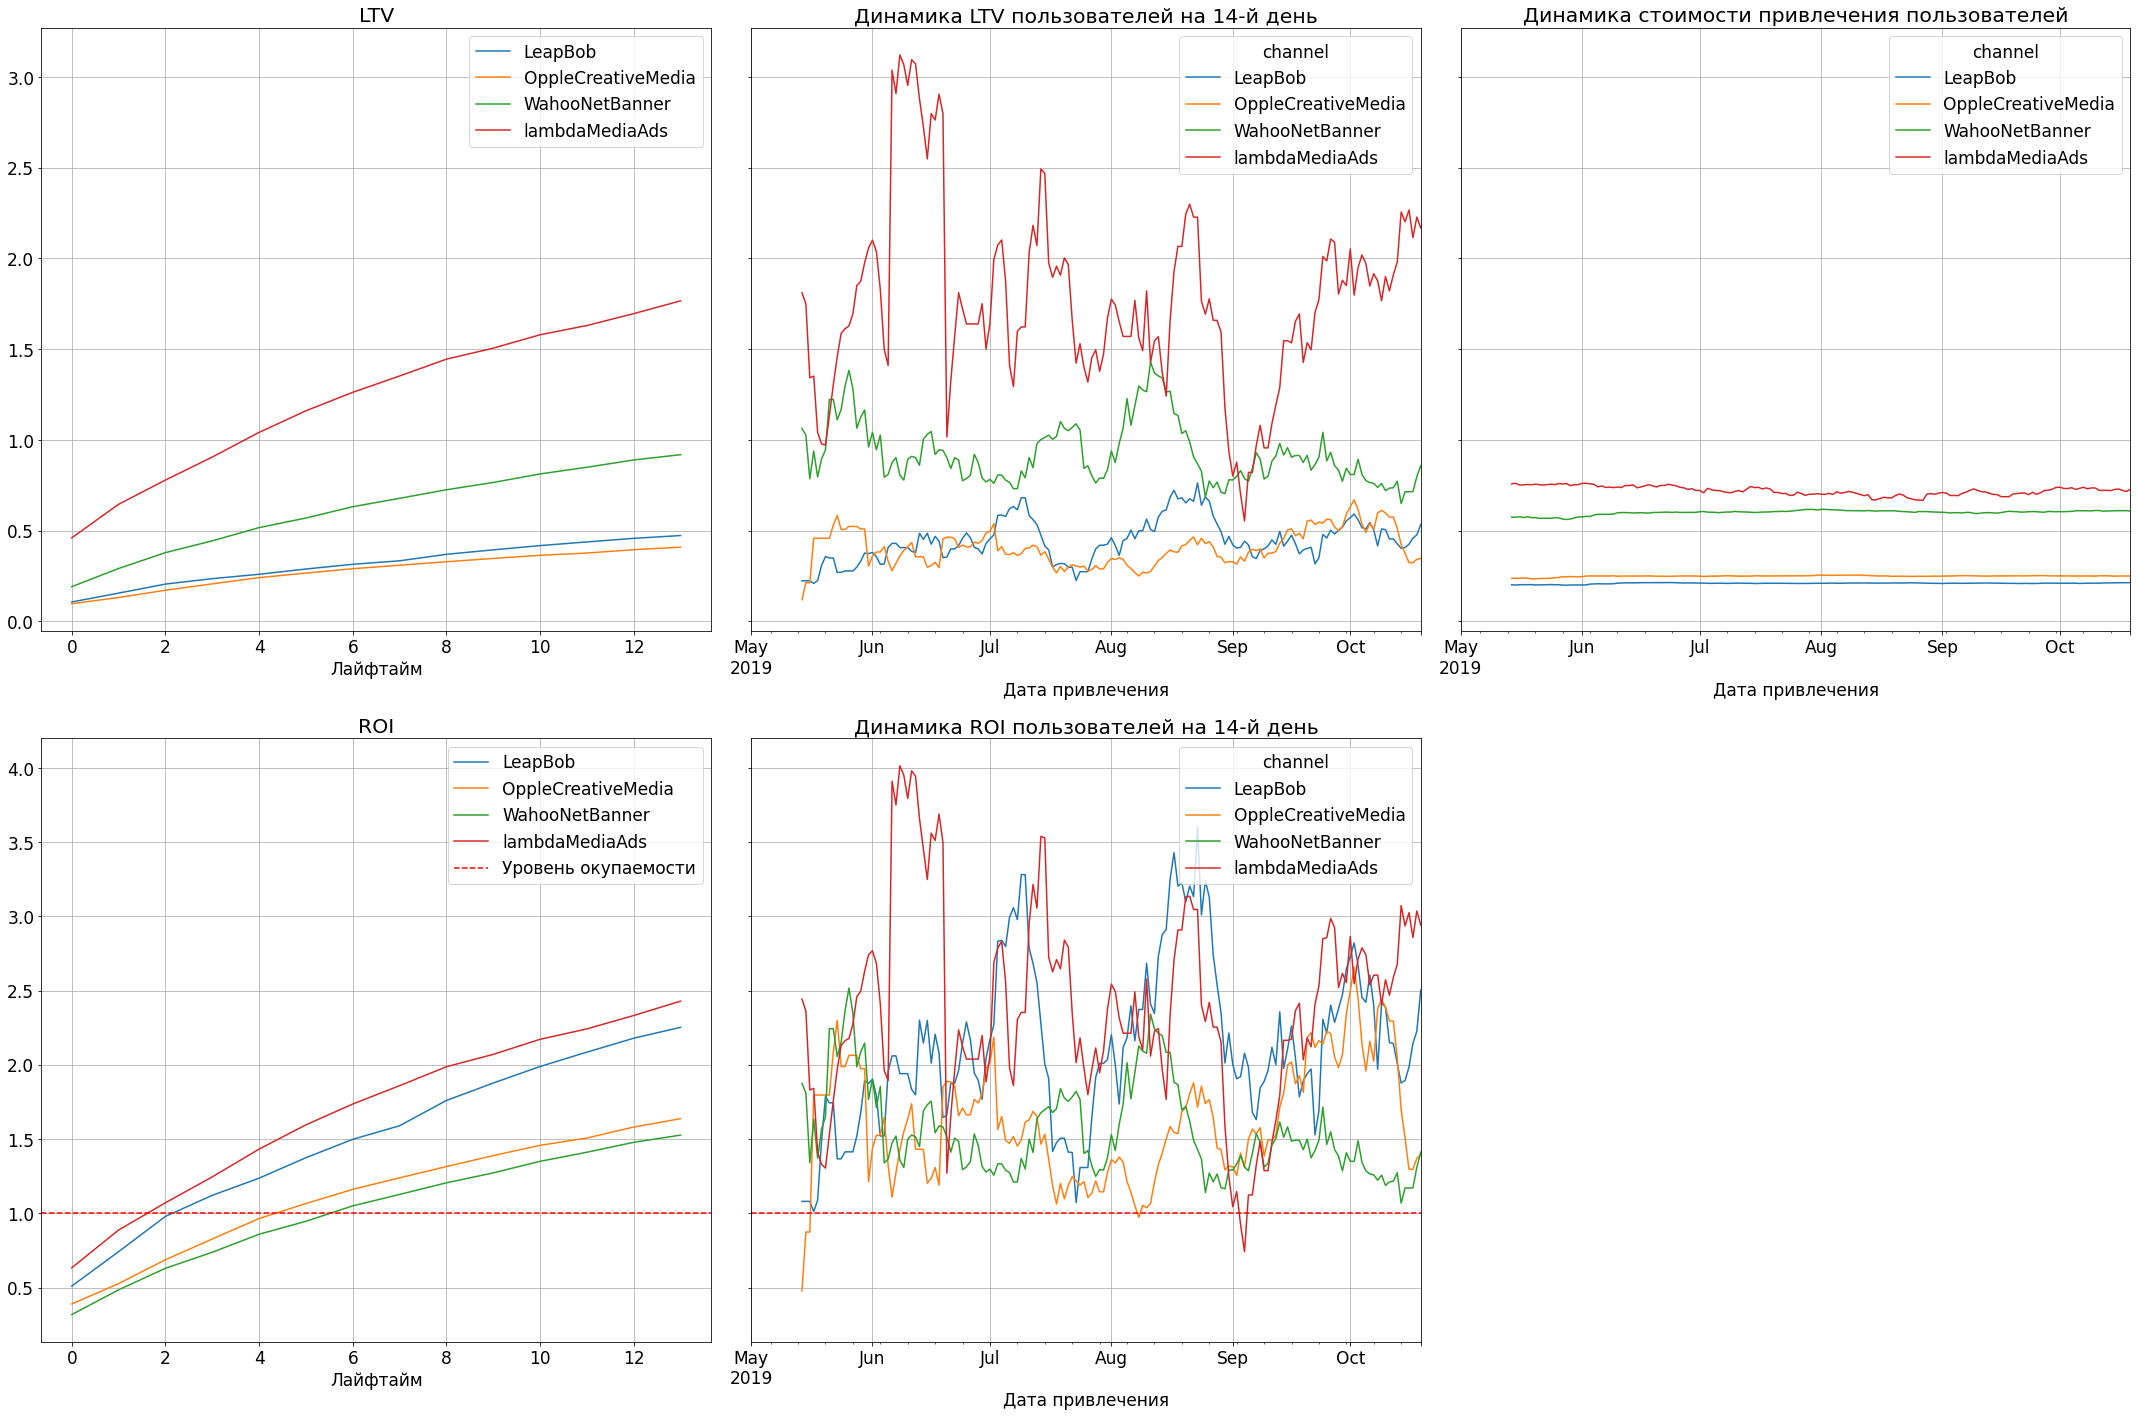

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

С точки зрения окупаемости наиболее эффективным кажется канал lambdaMediaAds, а также LeapBob. Посмотрим конверсию и удержание.

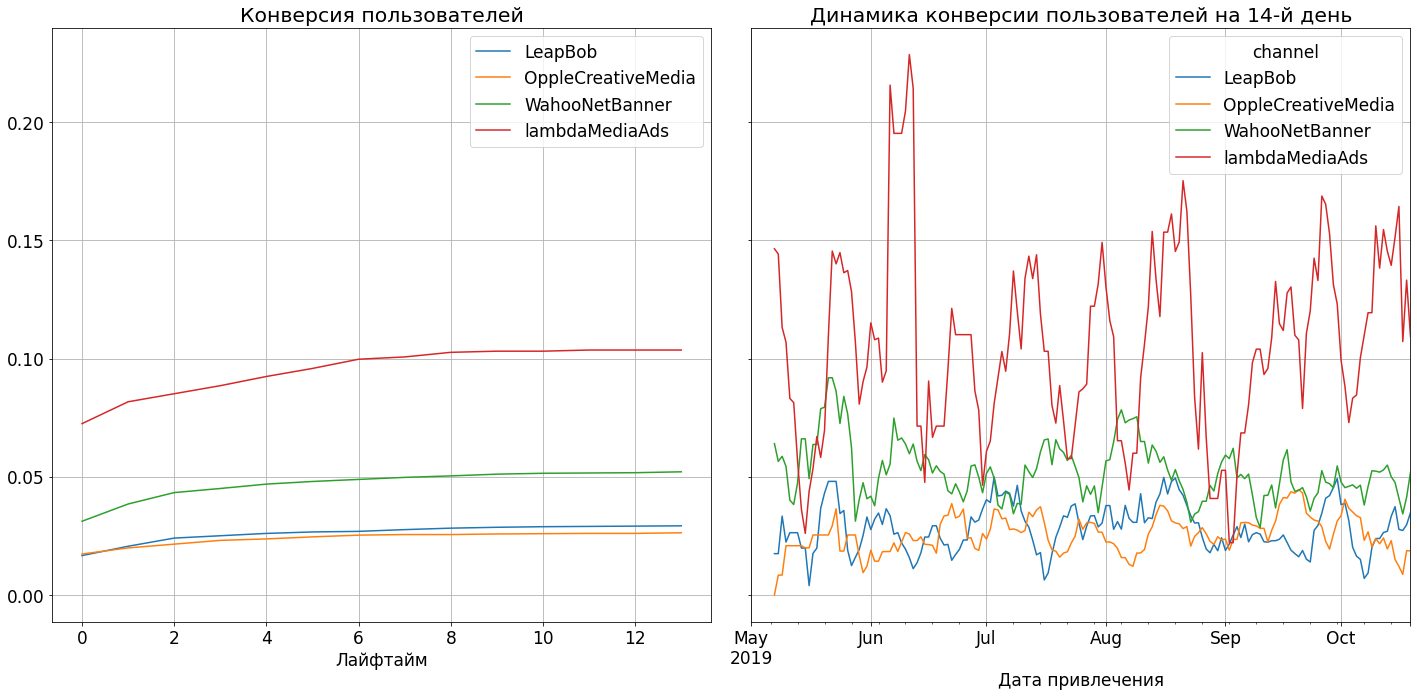

In [56]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

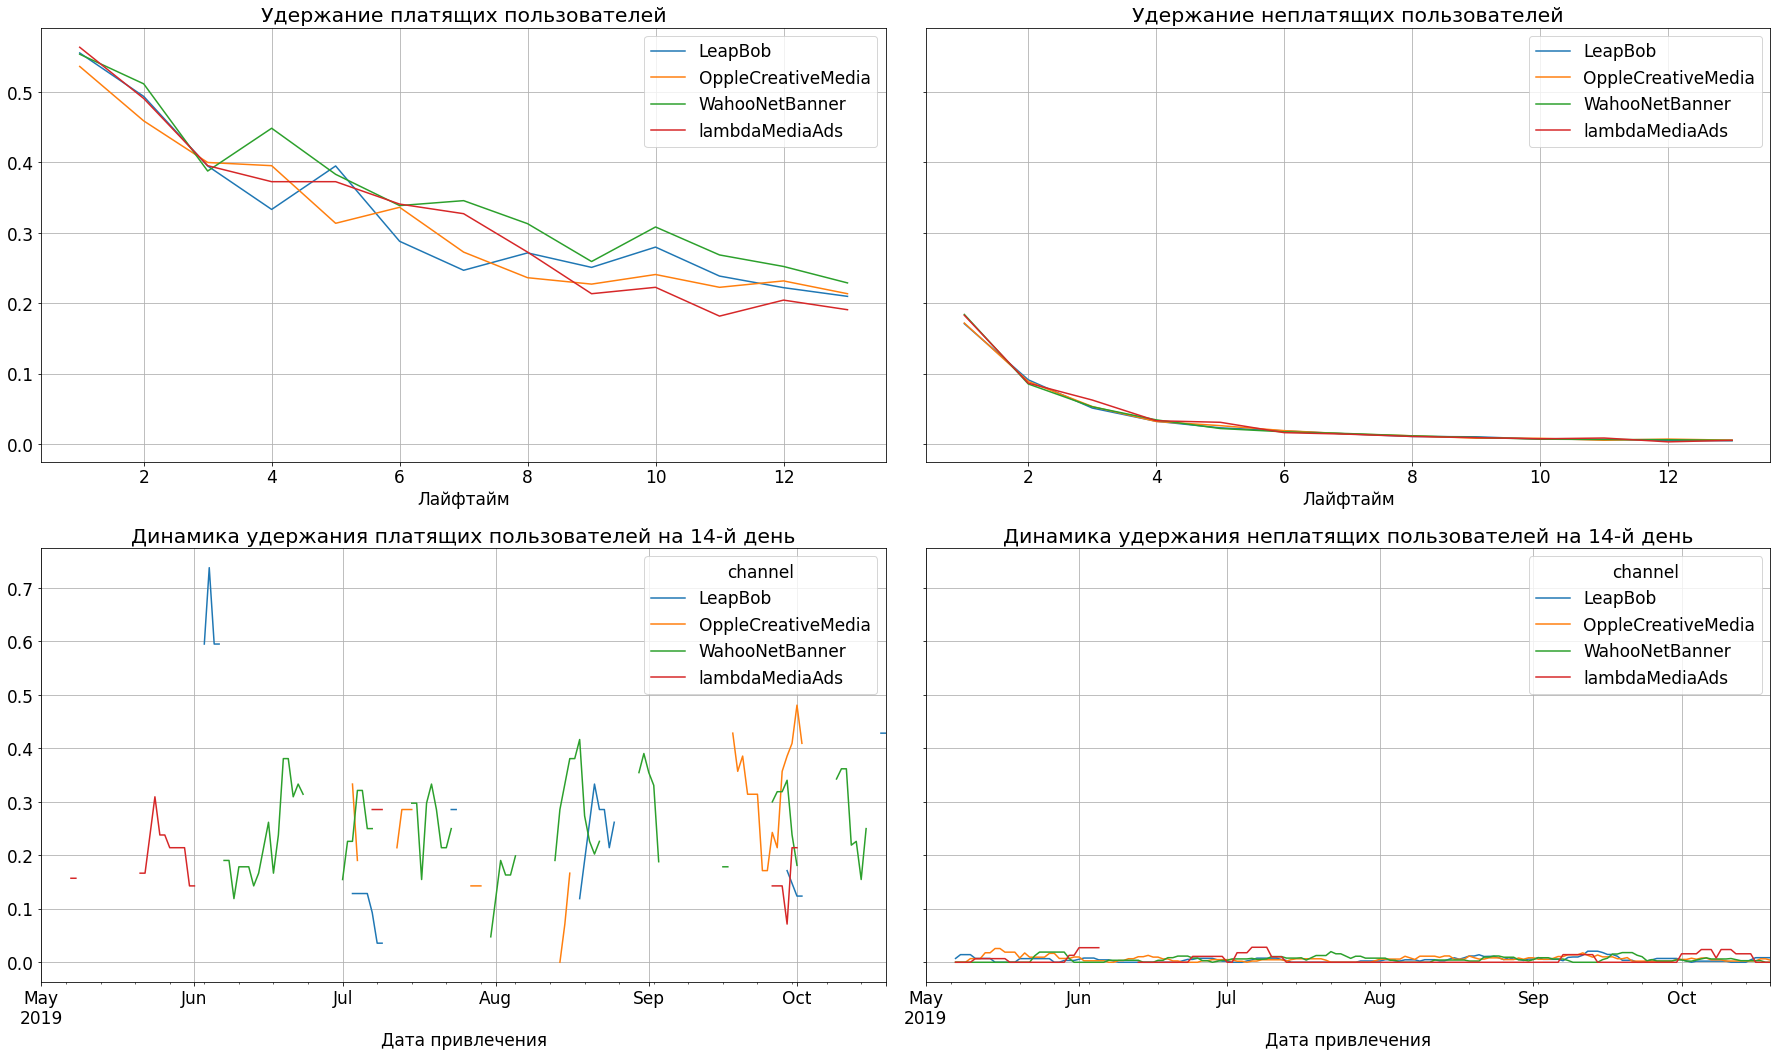

In [57]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_europe, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Но конверсия у LeapBob очень низкая, а вот lambdaMediaAds вполне можно рекомендовать как потенциально выгодный источник.

Таким образом, подытоживая исследование окупаемости, можно сделать следующий вывод. Судя по данным, в целом затраты на рекламу не окупаются ещё с июня. Однако негативное влияние оказывает аудитория из США, а именно из рекламных источников TipTop и FaceBoom, а также рекламный источник AdNonSense. Если посмотреть затраты без них, то реклама не только стабильно окупается всё время, но и становится более эффективной - в целом по всем пользователям CAC падает, а ROI растёт. Однако, если у источника TipTop всё нормально с показателями конверсии и удержания, что означает то, что он просто дорогой и неэффективный, то у пользователей из FaceBoom и AdNonSense показатель конверсии высокий, а вот удержание подозрительно маленькое. Стоит проверить всё ли ок с технической стороны при переходе в приложение из этих рекламных источников.

## Выводы

Исследовав данные о пользователях и их покупках в приложении Procrastinate Pro+, мы пришли к следующим причинам плохих показателей ROI и CAC:

- На LTV влияет сезонный фактор, но этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- Основными источниками проблемы являются каналы TipTop, FaceBoom и AdNonSense.
- Причиной возрастания CAC является канал TipTop, его значения с мая увеличиваются в разы, но безрезультатно.
- Причиной низкого ROI является также канал FaceBoom. Он составляет большую часть клиентов, при этом при высокой конверсии у него очень низкий показатель удержания пользоваталей. Такие же показатели у канала AdNonSense.

Таким образом, отделу маркетинга рекомендуется:

- Перестать покупать рекламу у канала TipTop.
- Выявить и исправить причины плохого удержания для пользователей из FaceBoom и AdNonSense.
- Разделить затраты отдельно на американский рынок и европейский. Возможно, стоит вложиться в канал RocketSuperAds в США и в канал lambdaMediaAds в Европе.
